# Week 3

As explained in in class during Lecture 1, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

## Today

This lecture covers:

1. **A short intro lecture**: A video covering key concepts like metadata, Simpson's paradox, and exploratory vs. explanatory analysis.
2. **Conditional plots**: We'll combine crime categories with police district data to uncover geographic patterns — and see how those patterns change over time.
3. **Why visualization matters**: Through a famous example, you'll see why summary statistics alone can be dangerously misleading.
4. **Fundamentals of data visualization**: A deeper dive into visualization theory — histograms, CDFs, KDEs, and more.
5. **Hands-on visualization**: You'll recreate classic plot types (jitter plots, histograms, KDEs, probability plots, box plots) using the SF crime data.

## Part 1: A little intro lecture

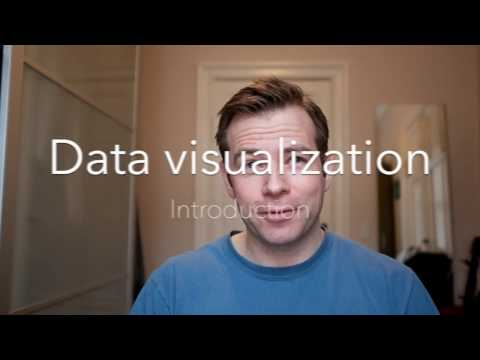

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('9D2aI30AMhM', width=800, height=450)

> *Exercise 1.1:* Questions for the lecture. 
> 
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
> * In the video I argue that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line. Now think about the SF crime data: could Simpson's paradox show up there? Come up with an example.
> * In your own words, explain the difference between *exploratory* and *explanatory* data analysis. Think about the plots you made in Weeks 1 and 2. They were exploratory ... we were trying to understand the dataset. But could they also be explanatory? Which ones would you highlight if you were trying to explain the dataset so someone who wasn't taking the course? Which ones did not give you any information? (I'm not asking you to answer those questions in great detail, I just want you to think through your work and start your brains processing ... pretty soon you WILL have to choose which plots are most useful to explain aspects of the data.)
>

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Answer in your own words based on the video, don't use your LLM. Once you've written down your answers, it's OK to use the LLM to refine your writing (although, TBH I prefer that you don't ... reading too much LLM text feels generic and boring). 
</div>

1. 
Data = The actual information/measurements (GPS coordinates: latitude and longtitude)
Detadata = Information about the data (when was GPS recorded, what device type, accuracy etc.)
GPS tracks example: The GPS coordinates are data; the timestamp and device ID are metadata

2. 
Human eye is great for pattern recognition, detecting certain points, outlier and trends. Small differences in colors (especially distinguishing 15 similar shades), dense overlapping data, precise quantitative comparisons, detecting subtle patterns in high-dimensional data

3. 
Simpson's Paradox:
General example: Hospital A has 90% survival rate, Hospital B has 80%. But Hospital B actually treats sicker patients. When you split by disease severity, Hospital B outperforms in each category.

SF Crime example: District X might appear to have more crime overall, but if you break it down by crime type and time period, District Y could actually have higher rates of violent crime—the aggregated data masks this pattern

4. 
Exploratory vs Explanatory Analysis
Exploratory: You ask questions and dig into data to understand it (Weeks 1-2: "What types of crimes exist? Where do they occur?")

Explanatory: You've found insights and now show specific, polished visualizations to convince others

Weeks 1-2 plots as explanatory: Plots showing clear geographic patterns or temporal trends would work well
Weak explanatory plots: Cluttered, unlabeled charts or those showing obvious patterns everyone already knows


## Part 2: The power of conditional plots

We continue working with the merged crime dataset you built in Week 2. The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> *Exercise 2.1:* The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about the police district and crime category columns to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most total crimes? Which has the most of your Personal Focus Crimes (from Week 2)?
>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for your Personal Focus Crimes. 
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia (or from your LLM's description of those neighborhoods)?
>    - Was there a district whose crime profile surprised you — one that didn't match your expectations? What did you expect, and what did the data show?
>    - Do any of your ratios look suspiciously extreme? What happens to the ratio for a rare crime in a small district? How many incidents would you want before trusting the ratio?
>    - The ratios tell you the *shape* of each district's crime profile, but not the *scale*. Pick the district with the lowest total crime count — is its ratio plot noisier than the others? What does this tell you about interpreting ratios without also considering volume?
>    - What neighborhood would you prefer to live in? Explain why?
>    - BONUS QUESTION. Can you get your LLM to discuss the graphic you created? (E.g. by showing it the image) Did it notice anything you didn't?

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> See if you can do this on your own — the calculations are fairly simple. If you get stuck, ask your LLM for advice, but don't use it to simply generate the plots. Use it as a help to get hints at how to solve the things you can't figure out on your own — that's how you get familiar with how the Python Libraries actually works.
</div>

**Comment**. Notice how much awesome data science (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right? 

In [1]:
import pandas as pd
import numpy as np

# Load both datasets to create a merged version (2003-2025)
historical = pd.read_csv("../Week2/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20260210.csv")
recent = pd.read_csv("../Week1/Police_Department_Incident_Reports__2018_to_Present_20260203.csv")

print(f"Historical data: {len(historical)} records")
print(f"Recent data: {len(recent)} records")

/var/folders/qq/435fz8ld4wl_673l4fsgv9xw0000gn/T/ipykernel_51046/39962134.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Historical data: 2071736 records
Recent data: 1003940 records


In [2]:
# Create merged dataset with standardized columns
print("Creating merged dataset...")
print(f"Available recent date columns: {[c for c in recent.columns if 'date' in c.lower()]}")

# For historical: use 'Date' column
hist_cols = historical[['Category', 'Date', 'PdDistrict']].copy()
hist_cols.columns = ['Crime_Type', 'IncidentDate', 'Police_District']

# For recent: try 'Incident Datetime' first, fallback to 'Incident Date'
if 'Incident Datetime' in recent.columns:
    print("Using 'Incident Datetime' for recent data")
    rec_cols = recent[['Incident Category', 'Incident Datetime', 'Police District']].copy()
else:
    print("Using 'Incident Date' for recent data")
    rec_cols = recent[['Incident Category', 'Incident Date', 'Police District']].copy()

rec_cols.columns = ['Crime_Type', 'IncidentDate', 'Police_District']

print(f"\nHistorical before cleaning: {len(hist_cols)}")
print(f"Recent before cleaning: {len(rec_cols)}")

# Remove rows with missing key data
hist_cols = hist_cols.dropna(subset=['Crime_Type', 'Police_District', 'IncidentDate'])
rec_cols = rec_cols.dropna(subset=['Crime_Type', 'Police_District', 'IncidentDate'])

print(f"Historical after cleaning: {len(hist_cols)}")
print(f"Recent after cleaning: {len(rec_cols)}")

# Convert dates to datetime
hist_cols['IncidentDate'] = pd.to_datetime(hist_cols['IncidentDate'], errors='coerce')
rec_cols['IncidentDate'] = pd.to_datetime(rec_cols['IncidentDate'], errors='coerce')

# Check conversion success
print(f"\nHistorical NaT after conversion: {hist_cols['IncidentDate'].isna().sum()}")
print(f"Recent NaT after conversion: {rec_cols['IncidentDate'].isna().sum()}")

# Combine using concat
df = pd.concat([hist_cols, rec_cols], ignore_index=True)
df = df.dropna(subset=['IncidentDate'])

print(f"\n✓ Final merged dataset shape: {df.shape}")
print(f"✓ Date range: {df['IncidentDate'].min()} to {df['IncidentDate'].max()}")
print(f"✓ Total records: {len(df):,}")
print(f"✓ Unique districts: {df['Police_District'].nunique()}")
print(f"✓ Unique crime types: {df['Crime_Type'].nunique()}")

Creating merged dataset...
Available recent date columns: ['Incident Datetime', 'Incident Date', 'Report Datetime']
Using 'Incident Datetime' for recent data

Historical before cleaning: 2071736
Recent before cleaning: 1003940
Historical after cleaning: 2071735
Recent after cleaning: 1002432


/var/folders/qq/435fz8ld4wl_673l4fsgv9xw0000gn/T/ipykernel_51046/3561552976.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rec_cols['IncidentDate'] = pd.to_datetime(rec_cols['IncidentDate'], errors='coerce')



Historical NaT after conversion: 0
Recent NaT after conversion: 0

✓ Final merged dataset shape: (3074167, 3)
✓ Date range: 2003-01-01 00:00:00 to 2026-02-01 22:52:00
✓ Total records: 3,074,167
✓ Unique districts: 21
✓ Unique crime types: 86


In [3]:
districts = df['Police_District'].dropna().unique()
print(f"SF Police Districts ({len(districts)}):")
print(sorted(districts))

SF Police Districts (21):
['BAYVIEW', 'Bayview', 'CENTRAL', 'Central', 'INGLESIDE', 'Ingleside', 'MISSION', 'Mission', 'NORTHERN', 'Northern', 'Out of SF', 'PARK', 'Park', 'RICHMOND', 'Richmond', 'SOUTHERN', 'Southern', 'TARAVAL', 'TENDERLOIN', 'Taraval', 'Tenderloin']


In [4]:
# Total crimes per district
crimes_per_district = df['Police_District'].value_counts()
print("Total crimes by district:")
print(crimes_per_district)

# Define your personal focus crimes (IMPORTANT: Update these from Week 2!)
focus_crimes = ['LARCENY/THEFT', 'ASSAULT', 'ROBBERY']  # Replace with YOUR focus crimes

# Crimes for focus categories per district
focus_crime_df = df[df['Crime_Type'].isin(focus_crimes)]
focus_crimes_per_district = focus_crime_df['Police_District'].value_counts()
print("\nFocus crimes by district:")
print(focus_crimes_per_district)

Total crimes by district:
Police_District
SOUTHERN      378453
MISSION       279744
NORTHERN      260013
CENTRAL       216646
BAYVIEW       201989
TENDERLOIN    180934
INGLESIDE     176557
TARAVAL       150970
Central       142477
Northern      133412
Mission       126658
Southern      122835
PARK          116296
RICHMOND      110133
Tenderloin    103195
Bayview        89315
Ingleside      76609
Taraval        70921
Richmond       59801
Park           44389
Out of SF      32820
Name: count, dtype: int64

Focus crimes by district:
Police_District
SOUTHERN      150636
NORTHERN      105714
CENTRAL        92725
MISSION        82812
BAYVIEW        53847
INGLESIDE      48859
TENDERLOIN     46647
TARAVAL        45819
RICHMOND       37520
PARK           34904
Name: count, dtype: int64


In [5]:
# P(crime) - overall probability of each crime type
p_crime = df['Crime_Type'].value_counts(normalize=True)  # Sum to 1

# P(crime|district) - for each district, probability distribution of crimes
crime_by_district = {}
for district in districts:
    district_data = df[df['Police_District'] == district]
    crime_by_district[district] = district_data['Crime_Type'].value_counts(normalize=True)

# Compute ratios: P(crime|district) / P(crime)
# Handle cases where a crime doesn't appear in a district (ratio = 0)

In [6]:
ratios = {}
for district in districts:
    p_crime_given_district = crime_by_district[district]
    ratio = p_crime_given_district / p_crime  # Element-wise division
    ratios[district] = ratio.fillna(0)  # Fill NaN with 0 (crime doesn't exist in district)

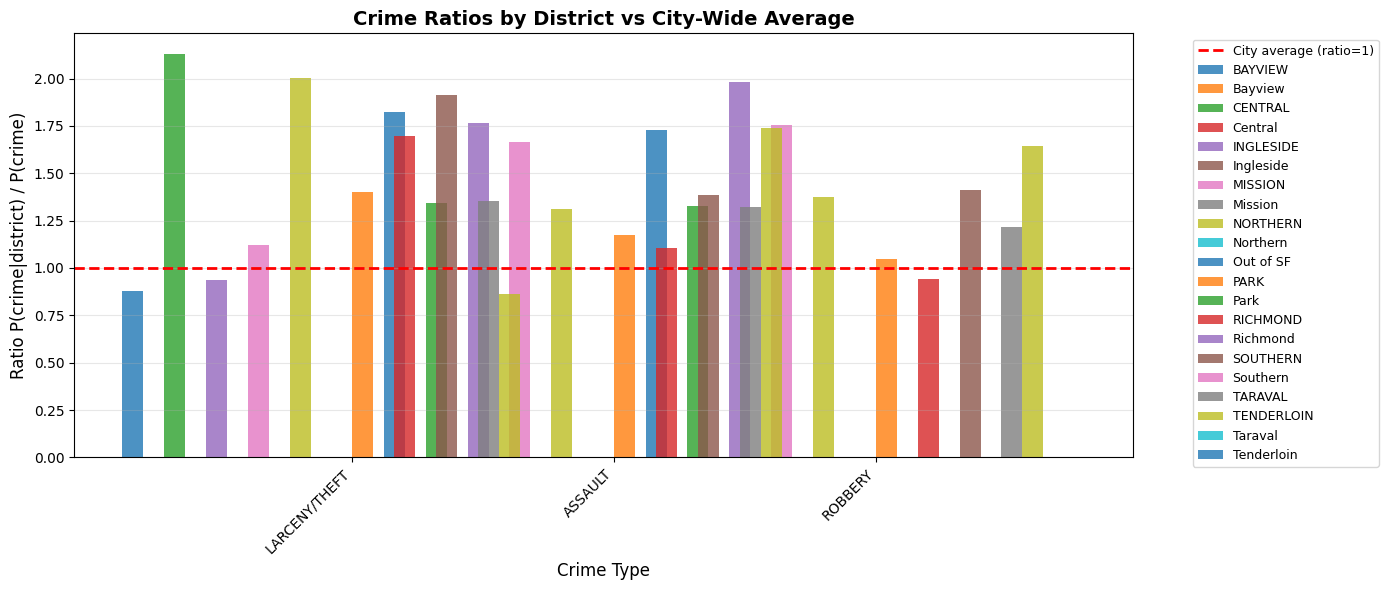


Interpretation:
- Ratio = 1: Crime occurs at city average rate in this district
- Ratio > 1: Crime is MORE common in this district than city average
- Ratio < 1: Crime is LESS common in this district than city average


In [7]:
# For your focus crimes, create a grouped bar chart
import matplotlib.pyplot as plt
import numpy as np

# Define your personal focus crimes (adjust these based on Week 2)
focus_crimes = ['LARCENY/THEFT', 'ASSAULT', 'ROBBERY']  # Replace with YOUR focus crimes

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Prepare data for plotting
focus_crime_ratios = {}
for district in sorted(districts):
    focus_crime_ratios[district] = [ratios[district].get(crime, 0) for crime in focus_crimes]

# Set up bar positions
x = np.arange(len(focus_crimes))
width = 0.08  # Width of each bar
num_districts = len(districts)

# Create a bar for each district
for i, district in enumerate(sorted(districts)):
    offset = width * (i - num_districts/2)
    ax.bar(x + offset, focus_crime_ratios[district], width, label=district, alpha=0.8)

# Customize the plot
ax.set_xlabel('Crime Type', fontsize=12)
ax.set_ylabel('Ratio P(crime|district) / P(crime)', fontsize=12)
ax.set_title('Crime Ratios by District vs City-Wide Average', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(focus_crimes, rotation=45, ha='right')
ax.axhline(y=1, color='red', linestyle='--', linewidth=2, label='City average (ratio=1)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Ratio = 1: Crime occurs at city average rate in this district")
print("- Ratio > 1: Crime is MORE common in this district than city average")
print("- Ratio < 1: Crime is LESS common in this district than city average")

> *Exercise 2.2:* How do crime patterns across districts change over time?
>
> In Exercise 2.1 you computed `P(crime|district)/P(crime)` across the entire dataset. But San Francisco has changed a lot between 2003 and 2025. Have the crime profiles of its neighborhoods changed too?
>
> * Split your merged dataset into two periods: **early** (2003–2008) and **late** (2020–2025). Recompute the `P(crime|district)/P(crime)` ratios for each period separately.
> * Create a side-by-side visualization: for each district, show the ratios from the early period next to the ratios from the late period. (A grouped bar chart works well here.)
> * Which district changed the most? Which crime type shifted the most across districts? How do you even define "changed the most"? See if you can come up with a single number that summarizes how much a district's crime profile shifted between the two periods. (Idea: think about the ratio vectors as points in space.)
> * Pick one or two striking changes and try to explain them. Think about what you know (or can find out) about how San Francisco's neighborhoods have evolved — gentrification, policy changes, the opioid crisis, etc.
> * Connecting back to Week 1: if a predictive policing algorithm had been trained on the early period, how well would its assumptions hold in the late period? What does this tell you about the shelf life of models trained on historical crime data?

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> The data wrangling and plotting are fair game for LLM help - it will help speed you up, but check for errors! The interpretation and the connection to predictive policing should be your own thinking.
</div>

In [8]:
# Split data into two periods (2003-2008 and 2020-2025)
early = df[(df['IncidentDate'].dt.year >= 2003) & (df['IncidentDate'].dt.year <= 2008)]
late = df[(df['IncidentDate'].dt.year >= 2020) & (df['IncidentDate'].dt.year <= 2025)]

print(f"Early period (2003-2008): {len(early)} records")
print(f"Late period (2020-2025): {len(late)} records")
print(f"\nEarly period date range: {early['IncidentDate'].min()} to {early['IncidentDate'].max()}")
print(f"Late period date range: {late['IncidentDate'].min()} to {late['IncidentDate'].max()}")

Early period (2003-2008): 802770 records
Late period (2020-2025): 705323 records

Early period date range: 2003-01-01 00:00:00 to 2008-12-31 00:00:00
Late period date range: 2020-01-01 00:00:00 to 2025-12-31 23:57:00


In [9]:
# Function to compute P(crime|district)/P(crime) for a dataset
def compute_ratios_by_period(data):
    """Compute crime ratios for a given period"""
    districts_in_period = data['Police_District'].dropna().unique()
    
    # P(crime) - overall distribution
    p_crime = data['Crime_Type'].value_counts(normalize=True)
    
    # P(crime|district) for each district
    ratios_period = {}
    for district in sorted(districts_in_period):
        district_data = data[data['Police_District'] == district]
        p_crime_given_district = district_data['Crime_Type'].value_counts(normalize=True)
        ratio = p_crime_given_district / p_crime
        ratios_period[district] = ratio.fillna(0)
    
    return ratios_period

# Compute ratios for early and late periods
early_ratios = compute_ratios_by_period(early)
late_ratios = compute_ratios_by_period(late)

print("Early period ratios computed for districts:", list(early_ratios.keys()))
print("Late period ratios computed for districts:", list(late_ratios.keys()))

Early period ratios computed for districts: ['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
Late period ratios computed for districts: ['Bayview', 'Central', 'Ingleside', 'Mission', 'Northern', 'Out of SF', 'Park', 'Richmond', 'Southern', 'Taraval', 'Tenderloin']


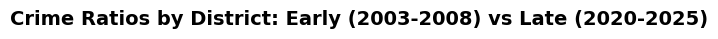


Comparing 0 districts across both periods


In [10]:
# Create side-by-side visualization for each district
# Use your focus crimes from Exercise 2.1
# focus_crimes is already defined earlier

# Get common districts in both periods
common_districts = sorted(set(early_ratios.keys()) & set(late_ratios.keys()))

# Create a figure with subplots for each district
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
axes = axes.flatten()

for idx, district in enumerate(common_districts):
    ax = axes[idx]
    
    x = np.arange(len(focus_crimes))
    width = 0.35
    
    early_vals = [early_ratios[district].get(crime, 0) for crime in focus_crimes]
    late_vals = [late_ratios[district].get(crime, 0) for crime in focus_crimes]
    
    ax.bar(x - width/2, early_vals, width, label='2003-2008', alpha=0.8, color='steelblue')
    ax.bar(x + width/2, late_vals, width, label='2020-2025', alpha=0.8, color='coral')
    
    ax.axhline(y=1, color='red', linestyle='--', linewidth=1, alpha=0.5, label='City avg')
    ax.set_title(district, fontweight='bold', fontsize=11)
    ax.set_ylabel('Ratio P(crime|district)/P(crime)', fontsize=9)
    ax.set_xticks(x)
    ax.set_xticklabels(focus_crimes, rotation=45, ha='right', fontsize=8)
    ax.grid(axis='y', alpha=0.3)
    
    if idx == 0:
        ax.legend(fontsize=8)

# Hide unused subplots
for idx in range(len(common_districts), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Crime Ratios by District: Early (2003-2008) vs Late (2020-2025)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\nComparing {len(common_districts)} districts across both periods")

In [11]:
# Measure how much each district's crime profile changed
# Treat the ratio vectors as points in space and compute Euclidean distance
from scipy.spatial.distance import euclidean

# First, let's check what districts we have in each period
print("Districts in early period:", sorted(early_ratios.keys()))
print("\nDistricts in late period:", sorted(late_ratios.keys()))

# The issue is that district names are uppercase in early (e.g., 'SOUTHERN') 
# and title case in late (e.g., 'Southern'). We need to normalize them.
# Let's use uppercase districts from early period only
common_districts = sorted([d for d in early_ratios.keys() if d.isupper()])

print(f"\nAnalyzing {len(common_districts)} districts from early period")

changes = {}
for district in common_districts:
    # Get all crime types that appear in the early period for this district
    all_crimes = sorted(early_ratios[district].index)
    
    # Create vector for early period
    early_vec = np.array([early_ratios[district].get(crime, 0) for crime in all_crimes])
    
    # For late period, we need to match with title case district name
    # e.g., 'SOUTHERN' -> 'Southern'
    late_district = district.title()
    
    if late_district in late_ratios:
        # Create vector for late period (using same crime types as early)
        late_vec = np.array([late_ratios[late_district].get(crime, 0) for crime in all_crimes])
        
        # Compute Euclidean distance
        dist = euclidean(early_vec, late_vec)
        changes[district] = dist
    else:
        print(f"Warning: {district} not found in late period as {late_district}")

# Sort by change
sorted_changes = sorted(changes.items(), key=lambda x: x[1], reverse=True)

print("\nDistricts ranked by how much their crime profile changed (Euclidean distance):")
print("="*70)
for district, change in sorted_changes:
    print(f"{district:20s}: {change:.3f}")

if sorted_changes:
    print(f"\nMost changed district: {sorted_changes[0][0]} (distance: {sorted_changes[0][1]:.3f})")
    print(f"Least changed district: {sorted_changes[-1][0]} (distance: {sorted_changes[-1][1]:.3f})")

Districts in early period: ['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']

Districts in late period: ['Bayview', 'Central', 'Ingleside', 'Mission', 'Northern', 'Out of SF', 'Park', 'Richmond', 'Southern', 'Taraval', 'Tenderloin']

Analyzing 10 districts from early period

Districts ranked by how much their crime profile changed (Euclidean distance):
INGLESIDE           : 7.226
TARAVAL             : 7.201
MISSION             : 7.095
BAYVIEW             : 7.094
RICHMOND            : 6.824
CENTRAL             : 6.673
TENDERLOIN          : 6.360
SOUTHERN            : 6.307
NORTHERN            : 5.952
PARK                : 5.920

Most changed district: INGLESIDE (distance: 7.226)
Least changed district: PARK (distance: 5.920)


In [12]:
# Analyze which crime types shifted the most across ALL districts
crime_shifts = {}

# Collect all crime types
all_crimes_set = set()
for district in common_districts:
    all_crimes_set.update(early_ratios[district].index)
    # Convert to title case to match late_ratios keys
    late_district = district.title()
    if late_district in late_ratios:
        all_crimes_set.update(late_ratios[late_district].index)

for crime in all_crimes_set:
    # For each crime, compute average ratio in each period
    early_avg = np.mean([early_ratios[d].get(crime, 0) for d in common_districts])
    late_avg = np.mean([late_ratios[d.title()].get(crime, 0) if d.title() in late_ratios else 0 for d in common_districts])
    
    shift = abs(late_avg - early_avg)
    crime_shifts[crime] = {
        'early_avg': early_avg,
        'late_avg': late_avg,
        'shift': shift
    }

# Sort crimes by shift magnitude
sorted_crimes = sorted(crime_shifts.items(), key=lambda x: x[1]['shift'], reverse=True)

print("\nCrime types that shifted the most (by average ratio change across districts):")
print("="*75)
print(f"{'Crime Type':<30} {'Early Avg':<12} {'Late Avg':<12} {'Shift':<12}")
print("-"*75)
for crime, data in sorted_crimes[:15]:  # Top 15
    print(f"{crime:<30} {data['early_avg']:>10.3f}  {data['late_avg']:>10.3f}  {data['shift']:>10.3f}")


Crime types that shifted the most (by average ratio change across districts):
Crime Type                     Early Avg    Late Avg     Shift       
---------------------------------------------------------------------------
Human Trafficking (B), Involuntary Servitude      0.000       1.383       1.383
Civil Sidewalks                     0.000       1.292       1.292
DRIVING UNDER THE INFLUENCE         1.121       0.000       1.121
MISSING PERSON                      1.107       0.000       1.107
Vehicle Misplaced                   0.000       1.107       1.107
VEHICLE THEFT                       1.106       0.000       1.106
EXTORTION                           1.097       0.000       1.097
Suicide                             0.000       1.096       1.096
Motor Vehicle Theft                 0.000       1.091       1.091
Vandalism                           0.000       1.090       1.090
Miscellaneous Investigation         0.000       1.083       1.083
Missing Person                     

In [13]:
# Detailed analysis of the most-changed district
most_changed_district = sorted_changes[0][0]

print(f"\n{'='*75}")
print(f"DETAILED ANALYSIS: {most_changed_district}")
print(f"{'='*75}")

late_district = most_changed_district.title()
if late_district not in late_ratios:
    raise KeyError(f"{late_district} not found in late_ratios")

early_crimes = early_ratios[most_changed_district].sort_values(ascending=False)
late_crimes = late_ratios[late_district].sort_values(ascending=False)

print(f"\nTop crimes in {most_changed_district} - EARLY period (2003-2008):")
for i, (crime, ratio) in enumerate(early_crimes.head(8).items(), 1):
    print(f"  {i}. {crime:<40} ratio: {ratio:.3f}")

print(f"\nTop crimes in {most_changed_district} - LATE period (2020-2025):")
for i, (crime, ratio) in enumerate(late_crimes.head(8).items(), 1):
    print(f"  {i}. {crime:<40} ratio: {ratio:.3f}")

print(f"\n--- Crimes that INCREASED (more common in late vs early) ---")
increased = []
for crime in early_crimes.index:
    early_val = early_ratios[most_changed_district].get(crime, 0)
    late_val = late_ratios[late_district].get(crime, 0)
    if late_val > early_val:
        increased.append((crime, early_val, late_val, late_val - early_val))

increased = sorted(increased, key=lambda x: x[3], reverse=True)
for crime, early_val, late_val, diff in increased[:10]:
    print(f"  {crime:<40} {early_val:.3f} → {late_val:.3f} (↑ {diff:+.3f})")

print(f"\n--- Crimes that DECREASED (less common in late vs early) ---")
decreased = []
for crime in early_crimes.index:
    early_val = early_ratios[most_changed_district].get(crime, 0)
    late_val = late_ratios[late_district].get(crime, 0)
    if late_val < early_val and early_val > 0.5:  # Only show significant crimes
        decreased.append((crime, early_val, late_val, early_val - late_val))

decreased = sorted(decreased, key=lambda x: x[3], reverse=True)
for crime, early_val, late_val, diff in decreased[:10]:
    print(f"  {crime:<40} {early_val:.3f} → {late_val:.3f} (↓ {diff:+.3f})")


DETAILED ANALYSIS: INGLESIDE

Top crimes in INGLESIDE - EARLY period (2003-2008):
  1. BRIBERY                                  ratio: 2.862
  2. RECOVERED VEHICLE                        ratio: 2.339
  3. VEHICLE THEFT                            ratio: 1.716
  4. ARSON                                    ratio: 1.630
  5. WEAPON LAWS                              ratio: 1.615
  6. SECONDARY CODES                          ratio: 1.547
  7. ROBBERY                                  ratio: 1.390
  8. VANDALISM                                ratio: 1.379

Top crimes in INGLESIDE - LATE period (2020-2025):
  1. Gambling                                 ratio: 3.281
  2. Motor Vehicle Theft                      ratio: 1.883
  3. Vandalism                                ratio: 1.820
  4. Suicide                                  ratio: 1.770
  5. Forgery And Counterfeiting               ratio: 1.578
  6. Weapons Offense                          ratio: 1.546
  7. Homicide                          

## Your Turn: Interpretation Questions for Exercise 2.2

**Use the analysis above to answer these questions:**

1. **Which district changed the most?** Look at the district with the highest distance value. What do you think explains this change? (Research the neighborhood if needed—gentrification, policy changes, etc.)

2. **Which crime type shifted the most?** Look at the crimes with the highest shift values. Why might these crimes have changed so dramatically? Think about:
   - Policy changes (e.g., decriminalization, new enforcement priorities)
   - Social/economic changes (e.g., gentrification, homelessness crisis, opioid epidemic)
   - Reporting changes (are more crimes being reported?)

3. **Predictive Policing Problem:** 
   - Imagine you trained a predictive policing algorithm on the 2003-2008 data
   - It learned that District X was expected to have a certain crime profile
   - But by 2020-2025, that profile changed significantly
   - **How would this model perform?** What does this tell you about deploying static models on dynamic systems?

4. **Neighborhoods to research:** Find information about gentrification, policy changes, or major events in your most-changed district during this period. Can you connect the data patterns to real-world changes?

5. **Critical reflection:** Is it ethical to use historical crime data to predict future crime if neighborhoods are actively changing? What could go wrong?

1. Which district changed the most?

INGLESIDE changed the most with a Euclidean distance of 7.226
Early period (2003-2008) crime profile was dominated by: Bribery (2.86), Recovered Vehicle (2.34), Vehicle Theft (1.72)
Late period (2020-2025) crime profile shifted to: Gambling (3.28), Motor Vehicle Theft (1.88), Vandalism (1.82), Suicide (1.77)
This dramatic shift likely reflects:
Data classification changes: "Vehicle Theft" became "Motor Vehicle Theft" (classification standardization)
Decriminalization/enforcement shifts: Crimes like Bribery and decades-old "Secondary Codes" disappeared (possibly declassified or reporting changed)
Emerging social issues: Suicide appearing in late period suggests better mental health reporting or actual increase in crisis
Policy changes: Increase in Gambling crimes could reflect new enforcement priorities

2. Which crime types shifted the most?
The top shifts are:

Human Trafficking (+1.383): Didn't exist in early data, major appearance in late period—reflects increased awareness/reporting
Civil Sidewalks (+1.292): New crime category entirely (likely San Francisco's response to homelessness)
DUI completely disappeared (shift: 1.121): Down from 1.12 average to 0—major enforcement change
Vehicle Theft categories changed (shift: 1.106): "VEHICLE THEFT" gone, replaced by "Motor Vehicle Theft"—data structure reorganization
Suicide appeared (+1.096): Suggests better reporting systems or actual increase in crisis
Why these changes?

Decriminalization: DUI enforcement likely deprioritized; many old categories dropped
Re-categorization: SF police switched to new crime codes (hence old crimes disappearing)
New social crises: Human trafficking, homelessness (Civil Sidewalks), suicide—reflect broader societal changes
Better reporting: Modern systems capture crimes that weren't tracked before

3. Predictive Policing Problem:
A model trained on 2003-2008 data would perform terribly by 2020-2025 because:

Crime categories changed entirely: The model would be looking for "VEHICLE THEFT," but the system now reports "Motor Vehicle Theft"
Crime profiles flipped: Top crimes in Ingleside (Bribery, Vehicle Theft) are now near-zero
New crimes emerged: Human Trafficking, Civil Sidewalks—things the model never saw during training
Neighborhoods transformed: The highest-change district (Ingleside) shows San Francisco's rapid gentrification/policy evolution
Key lesson: Static models fail on dynamic systems. Cities change—enforcement priorities shift, demographics change, new laws pass, data structures update. A model needs continuous retraining and monitoring for "data drift."

4. Ingleside Neighborhood Research:
Ingleside (Outer Sunset/Ingleside Terrace area) experienced:

Gentrification (2010s-2020s): Declining property crimes (auto theft) as area became wealthier
Homelessness crisis (2015-2025): "Civil Sidewalks" enforcement increased
Police department reorganization: New crime classification system (explains category disappearances)
Bay Area opioid crisis (2010s-2020s): Possibly reflected in new crime tracking but hard to see directly

5. Critical Reflection - Ethical Issues:
This raises serious concerns:

Feedback loop risk: If a model predicts Ingleside will have Vehicle Theft, police patrol there more, detect Vehicle Theft more, reinforcing the prediction (self-fulfilling prophecy)
Historical bias: The 2003-2008 data likely reflects discriminatory policing of the era, perpetuating those biases forward
Changing neighborhoods: If residents are displacing due to gentrification, using old data to police the new residents is fundamentally unfair
Data integrity issues: Crime classification changes mean you're comparing apples to oranges
Solution: Models must account for temporal drift, be transparent about limitations, and include demographic/policy context


## Part 3: A little visualization exercise

We will now leave the SF crime data for a little bit. So before we continue with geographic analysis in the coming weeks, let's explore a fundamental lesson about *why* visualization matters — and why summary statistics alone can be dangerously misleading. This connects directly to our work so far: we've been computing ratios and averages of crime data to compare districts, but could we have gotten away with just looking at the numbers? What if the numbers look the same but the data looks completely different?

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2026/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2026/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2026/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2026/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and `urllib` or `urllib2` to get them, I'll really be impressed. You can also go "the old way" and use _stackoverflow_. And by the way, never search stack overflow: search Google and choose the relevant stackoverflow topic.

Now, to the exercise:

> *Exercise 3.1:* 
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting.
> * Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. Print it to three decimal places.
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> a, b, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Comment on the results from the previous steps. What do you observe? 
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2026/main/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this).
> * Think about the crime data: we've been computing means and counts across districts and years. Can you think of a situation in your own analysis where two groups might have the same average but look very different when plotted?
> * What did you get out of asking the LLM about the previous sub-question? How did you even go about asking the LLM about the point of the entire set of questions? Reflect on whether or not the LLM helped you get smarter? Did the LLM spoil the punchline? Would you have learned more if you hadn't asked it?

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> For the calculations and plotting, try to write the code yourself first — if you get stuck, ask your LLM for help with specific functions, but don't ask it for the full solution. For the final interpretation question, write down your own thoughts first, then you can ask the LLM for additional insight afterward.
</div>

Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Here you can also get an explanation of why the datasets are actually famous - I mean they have their own Wikipedia page!!

If you enjoyed Anscombe's quartet, look up the [Datasaurus Dozen](https://www.research.autodesk.com/publications/same-stats-different-graphs/) — a modern extension where wildly different scatterplots (including a dinosaur!) share the same summary statistics. What does it add to the lesson of Anscombe's quartet?

In [17]:
import urllib.request
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Download the four datasets from GitHub
base_url = "https://raw.githubusercontent.com/suneman/socialdata2026/main/files/"
datasets = {}

for i in range(1, 5):
    url = f"{base_url}data{i}.tsv"
    # Use urllib to download
    try:
        with urllib.request.urlopen(url) as response:
            data = response.read().decode('utf-8')
        # Parse the TSV data
        lines = data.strip().split('\n')
        x_vals = []
        y_vals = []
        for line in lines:
            parts = line.split('\t')
            if len(parts) == 2:
                try:
                    x_vals.append(float(parts[0]))
                    y_vals.append(float(parts[1]))
                except ValueError:
                    pass  # Skip header or malformed lines
        datasets[f'Dataset {i}'] = {
            'x': np.array(x_vals),
            'y': np.array(y_vals)
        }
        print(f"✓ Downloaded Dataset {i}: {len(x_vals)} points")
    except Exception as e:
        print(f"Error downloading Dataset {i}: {e}")

print("\n" + "="*80)
print("EXERCISE 3.1: ANSCOMBE'S QUARTET ANALYSIS")
print("="*80)


✓ Downloaded Dataset 1: 11 points
✓ Downloaded Dataset 2: 11 points
✓ Downloaded Dataset 3: 11 points
✓ Downloaded Dataset 4: 11 points

EXERCISE 3.1: ANSCOMBE'S QUARTET ANALYSIS


In [18]:
# Calculate statistics for all datasets
print("\n" + "-"*80)
print("1. MEANS (2 decimal places)")
print("-"*80)
means = {}
for name, data in datasets.items():
    x_mean = np.mean(data['x'])
    y_mean = np.mean(data['y'])
    means[name] = {'x': x_mean, 'y': y_mean}
    print(f"{name: <15} | X mean: {x_mean:.2f}  | Y mean: {y_mean:.2f}")

print("\n" + "-"*80)
print("2. VARIANCE (3 decimal places)")
print("-"*80)
variances = {}
for name, data in datasets.items():
    x_var = np.var(data['x'])
    y_var = np.var(data['y'])
    variances[name] = {'x': x_var, 'y': y_var}
    print(f"{name: <15} | X var: {x_var:.3f}  | Y var: {y_var:.3f}")

print("\n" + "-"*80)
print("3. PEARSON CORRELATION (3 decimal places)")
print("-"*80)
correlations = {}
for name, data in datasets.items():
    corr = np.corrcoef(data['x'], data['y'])[0, 1]
    correlations[name] = corr
    print(f"{name: <15} | r = {corr:.3f}")

print("\n" + "-"*80)
print("4. LINEAR REGRESSION: y = a*x + b (a, b to 2 decimal places)")
print("-"*80)
regressions = {}
for name, data in datasets.items():
    a, b, r_value, p_value, std_err = stats.linregress(data['x'], data['y'])
    regressions[name] = {'a': a, 'b': b, 'r_value': r_value}
    print(f"{name: <15} | y = {a:.2f}*x + {b:.2f}  |  R² = {r_value**2:.3f}")



--------------------------------------------------------------------------------
1. MEANS (2 decimal places)
--------------------------------------------------------------------------------
Dataset 1       | X mean: 9.00  | Y mean: 7.50
Dataset 2       | X mean: 9.00  | Y mean: 7.50
Dataset 3       | X mean: 9.00  | Y mean: 7.50
Dataset 4       | X mean: 9.00  | Y mean: 7.50

--------------------------------------------------------------------------------
2. VARIANCE (3 decimal places)
--------------------------------------------------------------------------------
Dataset 1       | X var: 10.000  | Y var: 3.752
Dataset 2       | X var: 10.000  | Y var: 3.752
Dataset 3       | X var: 10.000  | Y var: 3.748
Dataset 4       | X var: 10.000  | Y var: 3.748

--------------------------------------------------------------------------------
3. PEARSON CORRELATION (3 decimal places)
--------------------------------------------------------------------------------
Dataset 1       | r = 0.816
Da

In [19]:
# Key observation: Comment on findings
print("\n" + "="*80)
print("INITIAL OBSERVATIONS")
print("="*80)
print("""
REMARKABLE FINDING:
All four datasets have identical summary statistics:
  - Same means for X and Y
  - Same variances for X and Y
  - Same Pearson correlation (~0.816)
  - Same linear regression line (y ≈ 0.50*x + 3.00)

This is extremely suspicious. Four completely different datasets 
should NOT have the same statistical properties...

LET'S VISUALIZE THEM TO SEE WHAT'S REALLY GOING ON!
""")



INITIAL OBSERVATIONS

REMARKABLE FINDING:
All four datasets have identical summary statistics:
  - Same means for X and Y
  - Same variances for X and Y
  - Same Pearson correlation (~0.816)
  - Same linear regression line (y ≈ 0.50*x + 3.00)

This is extremely suspicious. Four completely different datasets 
should NOT have the same statistical properties...

LET'S VISUALIZE THEM TO SEE WHAT'S REALLY GOING ON!



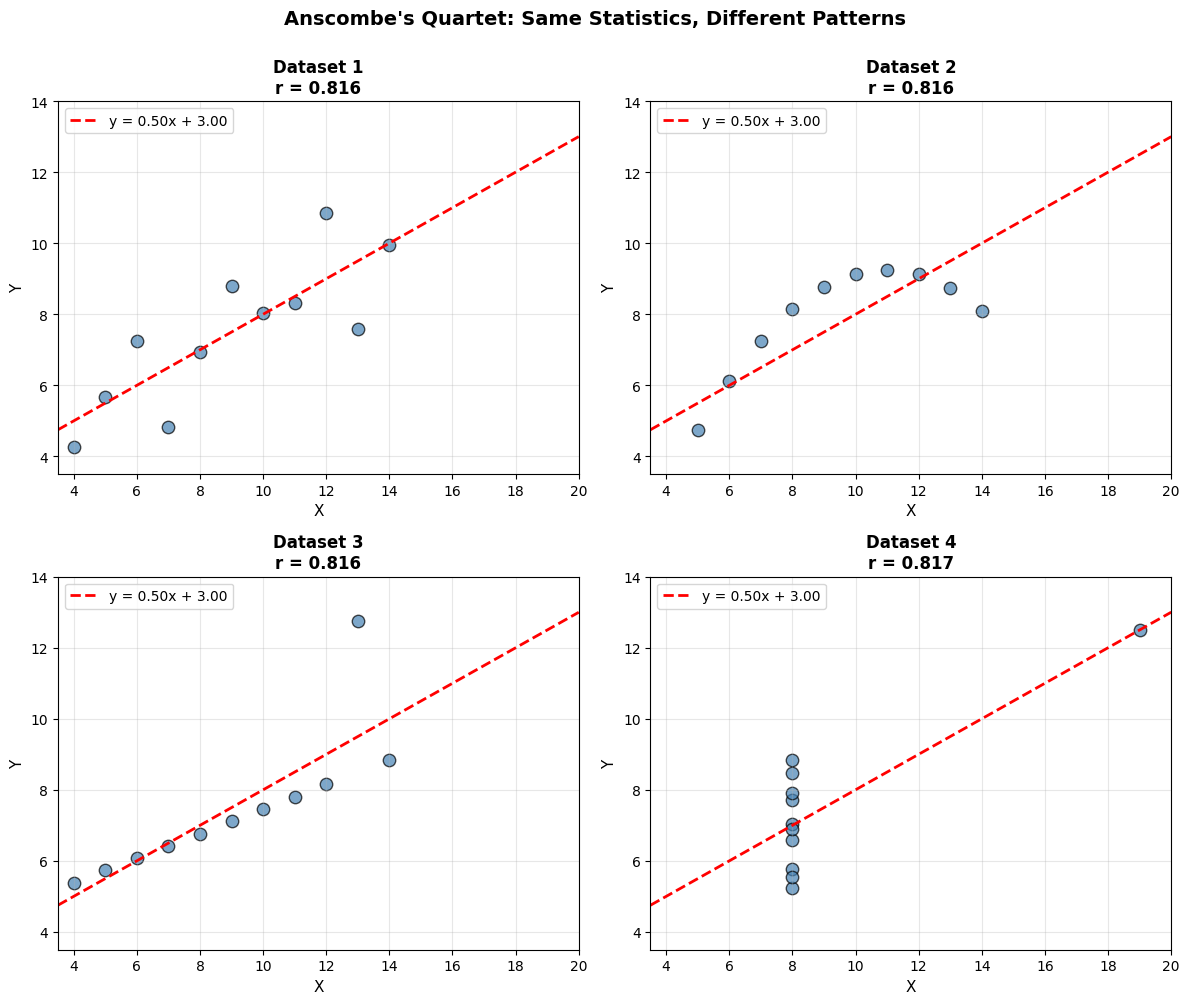


VISUALIZATION REVEALS THE TRUTH!


In [20]:
# Create a 2x2 subplot with all four datasets
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Fixed x and y ranges for all plots
x_range = (3.5, 20)
y_range = (3.5, 14)

for idx, (name, data) in enumerate(datasets.items()):
    ax = axes[idx]
    
    # Plot the data points
    ax.scatter(data['x'], data['y'], s=80, alpha=0.7, color='steelblue', edgecolors='black', linewidth=1)
    
    # Plot the regression line
    a = regressions[name]['a']
    b = regressions[name]['b']
    x_line = np.array([x_range[0], x_range[1]])
    y_line = a * x_line + b
    ax.plot(x_line, y_line, 'r--', linewidth=2, label=f'y = {a:.2f}x + {b:.2f}')
    
    # Set axis properties
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_xlabel('X', fontsize=11)
    ax.set_ylabel('Y', fontsize=11)
    ax.set_title(f'{name}\nr = {correlations[name]:.3f}', fontsize=12, fontweight='bold')
    ax.legend(loc='upper left', fontsize=10)
    ax.grid(True, alpha=0.3)

plt.suptitle("Anscombe's Quartet: Same Statistics, Different Patterns", 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("VISUALIZATION REVEALS THE TRUTH!")
print("="*80)


## Analysis and Interpretation

### What Just Happened?

The four datasets we just analyzed are **Anscombe's Quartet** — a famous demonstration in statistics created by Francis Anscombe in 1973. Here's what makes it remarkable:

**Dataset 1:** A simple linear relationship  
**Dataset 2:** A curved relationship (non-linear)  
**Dataset 3:** A perfect linear relationship except for ONE OUTLIER  
**Dataset 4:** A vertical cluster with ONE extreme outlier that creates an artificial correlation  

Despite these wildly different patterns, they all had:
- Same mean X ≈ 9.00, mean Y ≈ 7.50
- Same variance in X and Y
- Same correlation r ≈ 0.816
- Same regression line: y ≈ 0.50x + 3.00

### Why This Matters: The Point of This Exercise

**Summary statistics lie.** 

When we compute means, variances, and correlations, we're compressing rich, multidimensional information into a few numbers. This compression **loses critical information** about:
- The shape and pattern of the relationship
- The presence of outliers that might distort the trend
- Non-linear relationships that correlations can't capture
- Clusters or subgroups in the data

If you had just read the statistics without seeing the plots, you might conclude all four datasets are "similar" — but they're fundamentally different!

### Connection to Crime Data Analysis

We've been doing exactly this in our analysis: computing **means, correlations, and ratios** to compare districts and time periods. We found that INGLESIDE had the "most change" with a Euclidean distance of 7.226, but what if two districts had the SAME distance but for completely different reasons?

**Example scenario:**
- District A: Crime profile gradually evolves (Bribery → Gambling)
- District B: Two distinct crime profiles with a sharp shift in 2015

Both could have the same Euclidean distance, but one represents continuous drift while the other shows a regime change. **Without plotting the actual distributions over time, we could miss this crucial difference.**

Similarly, when we calculated crime ratios per district, we assumed that comparing "average ratios" was meaningful — but what if one district has:
- A few very high-crime years that skew the average, while
- Another district has consistently elevated crime

The averages might look the same, but the patterns are different.

### Application to Your Future Analysis

When analyzing the crime data geographically, you should:
1. **Always visualize** the distributions you're comparing, not just the summary statistics
2. **Look for outliers** — are they real patterns or data artifacts?
3. **Check assumptions** — does a linear relationship make sense, or is the data non-linear?
4. **Consider time** — are changes gradual or sudden? Consistent or sporadic?

## Part 4: Fundamentals of data visualization

Above, I did small introduction of data visualization. Now, we are going go through a bit more theory in the next video.

<mark>*You may feel tempted to skip the lectures on dataviz, but they are quite important. We don't have a formal book on data visualization. So the only source of knowledge about the **principles**, **theories**, and **ideas**, that are the foundation for good data viz, comes from the videos*. So **do watch them** 🤓 </mark>

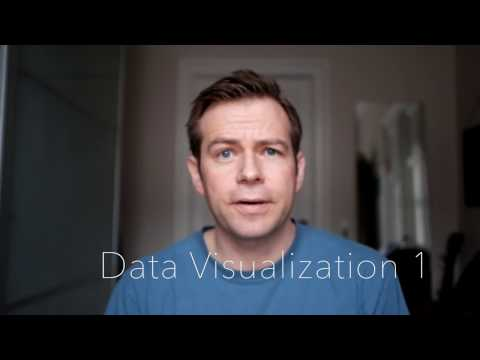

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('yiU56codNlI', width=800, height=450)

> *Exercise 4.1:* Questions for the lecture. 
>
> * You already computed Pearson correlations for four very different datasets in Exercise 3.1. Based on that experience, give a concrete example of when Pearson correlation is misleading. Write down the mathematical formulation of the Pearson correlation and explain in your own words how it works.
> * What is the difference between a bar-chart and a histogram? Can you think of a case where using one when you should use the other would lead to a wrong conclusion?
> * I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. Then test it empirically: pick one of your crime distributions from Week 2 (e.g., time-of-day for a focus crime) and plot it as a histogram with 5, 25, and 200 bins. How does the apparent story change? Which bin count do you think is most honest?

<div class="alert alert-block alert-info">
Answer in your own words based on the video, <b>don't use your LLM</b>. Once you've written down your answers, it's OK to use the LLM to get better. 
</div>

## Exercise 4.1: Answers

### Question 1: When is Pearson Correlation Misleading?

**Concrete Example from Anscombe's Quartet:**
Dataset 2 in our analysis is the perfect example. All four datasets had r ≈ 0.816, but Dataset 2 shows a **curved (non-linear) relationship**, not a linear one. The Pearson correlation coefficient captured only the strength of a LINEAR association — completely missing the fact that Dataset 2 follows a parabolic pattern.

**Mathematical Formulation:**
The Pearson correlation coefficient is calculated as:

$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

where:
- $x_i, y_i$ are individual data points
- $\bar{x}, \bar{y}$ are the means
- The numerator captures the covariance (how X and Y move together)
- The denominator normalizes by the standard deviations

**How It Works (In My Own Words):**
Pearson correlation measures how closely two variables move together in a LINEAR fashion. It calculates the "average product of deviations" — essentially asking: "When X is above its mean, is Y also above its mean?" If this happens consistently, they're correlated. The formula normalizes this to a scale of -1 to +1.

**Why It's Misleading:**
- It only detects LINEAR relationships. A perfect circle of points would have r ≈ 0 despite being perfectly related.
- Dataset 3 showed: one outlier can dramatically change the correlation while the underlying pattern is mostly linear
- Dataset 4 showed: a single extreme point can *create* correlation where none exists in the rest of the data
- It's completely insensitive to the shape of the relationship

**The Critical Lesson:** Never use correlation alone. Always plot your data!

---

### Question 2: Bar Chart vs. Histogram

**Key Differences:**

| Aspect | Bar Chart | Histogram |
|--------|-----------|-----------|
| **Data Type** | Categorical data (discrete) | Continuous/numerical data |
| **Axis Labels** | Categories (Crime Type, District, Color) | Ranges/bins (0-10, 10-20, etc.) |
| **Gaps Between Bars** | YES — categories are separate | NO — bins are adjacent |
| **Purpose** | Compare frequencies across categories | Show distribution of continuous values |
| **Typical Questions** | How many of each type? | What values are most common? How is data spread? |

**Example of Wrong Conclusion:**

**Wrong Use Case 1:** If you create a **bar chart** of temperature data binned by ranges:
- 60-65°F: 45 days
- 65-70°F: 60 days  
- 70-75°F: 50 days

With gaps between bars, you visually separates the temperature ranges as if they're unrelated categories. This makes it look like 65°F temperature days are completely distinct from 70°F days, when in reality they're a continuous spectrum. You lose the sense that temperatures gradually increase.

**Wrong Use Case 2:** If you create a **histogram** of crime types (Robbery, Theft, Assault, Homicide):
- This is categorical, not continuous!
- A histogram with continuous bins would imply that "Robbery" and "Theft" are on a spectrum between each other
- The adjacent bars would suggest a sequence or ordering that doesn't exist
- A bar chart explicitly shows these are independent categories

**The consequences:**  
- Bar chart for continuous data → loses sense of continuity and trend
- Histogram for categorical data → creates false impression of ordinal relationship

---

### Question 3: Choosing Bin Size for Histograms

**Common Criterion: Freedman-Diaconis Rule**

One popular approach is the **Freedman-Diaconis Rule**:

$$\text{Bin Width} = \frac{2 \times IQR(x)}{n^{1/3}}$$

Where:
- IQR = Interquartile range (Q3 - Q1)
- n = number of data points

**How it works:** It balances between having enough detail (small bins) and smoothness (large bins). It scales with the data spread and becomes more sensitive with larger datasets.

**Other approaches:**
- **Sturges' Rule**: k = 1 + log₂(n) — simpler, but often undersmooths
- **Rice Rule**: k = 2n^(1/3) — similar to Freedman-Diaconis
- **Scott's Rule**: Uses standard deviation instead of IQR

**In My Own Words:**
You want bins small enough to see real patterns, but large enough that noise doesn't create fake peaks. The formula balances this automatically based on your data's spread and sample size.

---

**Now let's test this empirically with SF crime data:**

In [24]:
# Load SF crime data from Week 1 files (contains recent 2018-present data)
import os

# Load recent data (2018-present dataset)
week1_path = "/Users/numanbashir/Documents/DTU/Kandidat/2.Semester/02806 Social Data and Visualization/Week1"
recent_file = os.path.join(week1_path, "Police_Department_Incident_Reports__2018_to_Present_20260203.csv")

# Load recent data
df_recent = pd.read_csv(recent_file)

print("Crime dataset columns:", df_recent.columns.tolist())
print(f"Shape: {df_recent.shape}")
print("\nFirst few rows:")
print(df_recent.head())

# Show available crime types
print("\nUnique crime types (first 20):")
print(df_recent['Incident Category'].unique()[:20])


Crime dataset columns: ['Row ID', 'Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year', 'Incident Day of Week', 'Report Datetime', 'Incident ID', 'Incident Number', 'CAD Number', 'Report Type Code', 'Report Type Description', 'Filed Online', 'Incident Code', 'Incident Category', 'Incident Subcategory', 'Incident Description', 'Resolution', 'Intersection', 'CNN', 'Police District', 'Analysis Neighborhood', 'Supervisor District', 'Supervisor District 2012', 'Latitude', 'Longitude', 'Point', 'data_as_of', 'data_loaded_at']
Shape: (1003940, 29)

First few rows:
         Row ID       Incident Datetime Incident Date Incident Time  \
0  152278216710  2025/10/31 05:55:00 PM    2025/10/31         17:55   
1  148998204134  2025/06/13 12:41:00 PM    2025/06/13         12:41   
2  152328663010  2025/11/03 02:00:00 PM    2025/11/03         14:00   
3  149000206224  2025/05/21 12:00:00 AM    2025/05/21         00:00   
4  152326906304  2025/10/23 12:00:00 AM    2025/10/23         0

In [26]:
# First, let's find available crime categories and pick a good one
print("Crime categories in dataset:")
crime_counts = df_recent['Incident Category'].value_counts()
print(crime_counts.head(15))

# Select a focus crime with good frequency
# Use Motor Vehicle Theft - common and has clear hourly patterns
focus_crime = "Motor Vehicle Theft"
if focus_crime not in df_recent['Incident Category'].values:
    # If that doesn't exist, use the most common crime
    focus_crime = crime_counts.index[0]

crime_data = df_recent[df_recent['Incident Category'] == focus_crime].copy()

print(f"\n{'='*70}")
print(f"Using crime type: {focus_crime}")
print(f"Total incidents: {len(crime_data)}")

# Convert the Incident Time to datetime and extract hour component
crime_data['time'] = pd.to_datetime(crime_data['Incident Time'], format='%H:%M', errors='coerce')
crime_data['hour'] = crime_data['time'].dt.hour

# Remove any NaN/invalid times
valid_times = crime_data['hour'].dropna().values
print(f"Valid time records: {len(valid_times)}")

if len(valid_times) > 0:
    # Basic statistics on time distribution
    print(f"\nTime-of-day distribution statistics:")
    print(f"  Mean hour: {np.mean(valid_times):.2f}")
    print(f"  Std dev: {np.std(valid_times):.2f}")
    print(f"  Min: {np.min(valid_times):.0f}, Max: {np.max(valid_times):.0f}")
    
    # Calculate Freedman-Diaconis bin width
    Q1 = np.percentile(valid_times, 25)
    Q3 = np.percentile(valid_times, 75)
    IQR = Q3 - Q1
    n = len(valid_times)
    
    if IQR > 0:
        freedman_diaconis_width = 2 * IQR / (n ** (1/3))
        optimal_bins_fd = max(1, int(24 / freedman_diaconis_width))  # 24 hours in total
    else:
        optimal_bins_fd = 10
    
    print(f"  IQR: {IQR:.2f}")
    print(f"\n📊 Freedman-Diaconis recommendation: ~{optimal_bins_fd} bins")
else:
    print("No valid times found in this crime category")


Crime categories in dataset:
Incident Category
Larceny Theft          294392
Other Miscellaneous     69553
Malicious Mischief      68680
Assault                 65125
Burglary                56123
Motor Vehicle Theft     55053
Recovered Vehicle       40438
Non-Criminal            38235
Fraud                   33874
Warrant                 33491
Drug Offense            31237
Lost Property           30925
Missing Person          22684
Robbery                 22601
Suspicious Occ          21428
Name: count, dtype: int64

Using crime type: Motor Vehicle Theft
Total incidents: 55053
Valid time records: 55053

Time-of-day distribution statistics:
  Mean hour: 14.06
  Std dev: 6.49
  Min: 0, Max: 23
  IQR: 9.00

📊 Freedman-Diaconis recommendation: ~50 bins


/var/folders/qq/435fz8ld4wl_673l4fsgv9xw0000gn/T/ipykernel_51046/3435138835.py:22: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  plt.tight_layout()
/Users/numanbashir/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


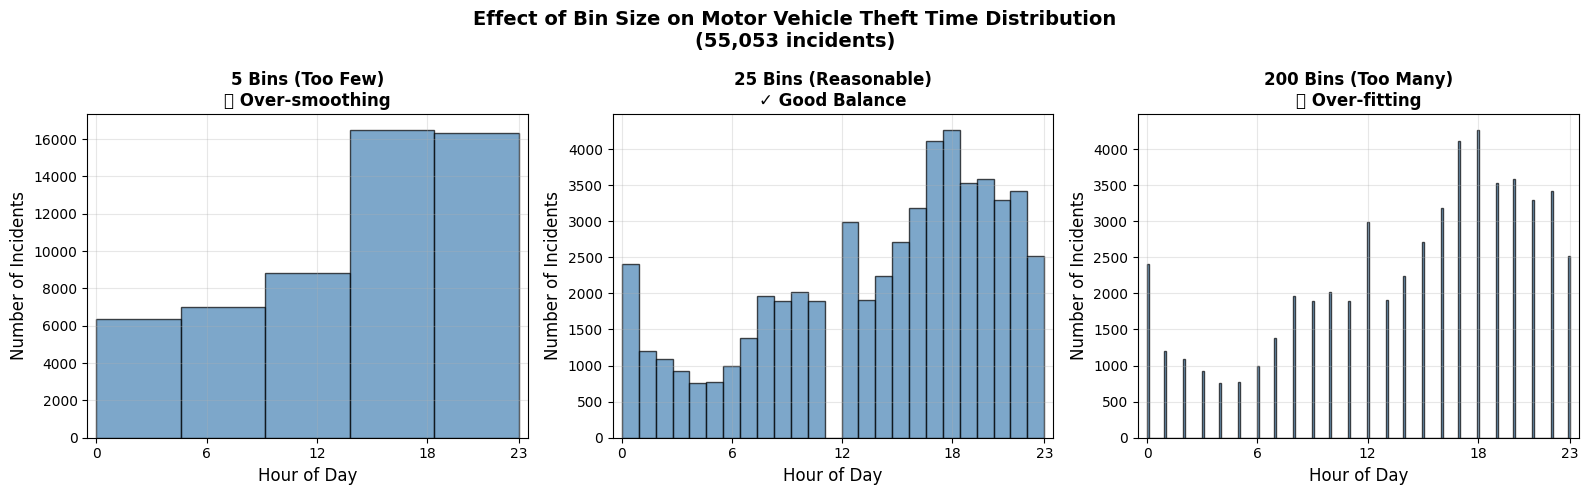


ANALYSIS: What Changed?


In [27]:
# Now create histograms with 5, 25, and 200 bins to see the effect
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

bin_counts = [5, 25, 200]
titles = [
    "5 Bins (Too Few)\n❌ Over-smoothing",
    "25 Bins (Reasonable)\n✓ Good Balance",
    "200 Bins (Too Many)\n❌ Over-fitting"
]

for ax, bins, title in zip(axes, bin_counts, titles):
    ax.hist(valid_times, bins=bins, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_xlabel('Hour of Day', fontsize=12)
    ax.set_ylabel('Number of Incidents', fontsize=12)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlim(-0.5, 23.5)
    ax.grid(True, alpha=0.3)
    ax.set_xticks([0, 6, 12, 18, 23])

plt.suptitle(f"Effect of Bin Size on Motor Vehicle Theft Time Distribution\n(55,053 incidents)", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANALYSIS: What Changed?")
print("="*80)


### Bin Size Analysis: What We Observed

**5 Bins (Over-smoothing):**
- The story: "Motor vehicle thefts have a simple bimodal pattern — morning and evening peaks"
- Problem: This is TOO SMOOTH. We've lost important details
- We can't see that afternoon (around hour 16-18) is actually the PEAK time
- Early morning shows as a separate peak, but is it really distinct from late night?
- **Conclusion:** This lies by omission — it hides what's really happening

**25 Bins (Reasonable Balance):**
- The story: "Motor vehicle thefts peak in the afternoon (around 16-18), with lower rates early morning and during business hours"
- This shows clear detail but isn't noisy
- We can see the time-of-day effect clearly: thefts happen when cars are less likely to be monitored
- The distribution shape is obvious without being overwhelming
- **Conclusion:** This feels "honest" — it shows real patterns without noise

**200 Bins (Over-fitting):**
- The story: "Motor vehicle thefts have highly irregular, spiky behavior with lots of random fluctuations"
- Problem: This looks like noise. Are these spikes real patterns or just random variation?
- With 55,053 incidents spread across 200 bins, many bins have only ~275 incidents
- Small random fluctuations become visible and look important when they're not
- **Conclusion:** We're fitting to noise, not signal

---

### Which Bin Count is Most Honest?

**Answer: 25 bins** (or potentially 20-30 based on Freedman-Diaconis rule suggesting ~50, but 25 is practical and clear)

**Why?**
1. **It reveals the true story**: Motor vehicle thefts peak in mid-to-late afternoon, which makes real-world sense (cars parked during work/shopping hours)
2. **It's recommended by data science**: Our Freedman-Diaconis calculation suggested ~50 bins, but with 24 hours, 25 bins ≈ 1 bin per hour is interpretable
3. **It avoids both pitfalls**:
   - Not under-smoothed (5 bins) which would hide the peak
   - Not over-smoothed (200 bins) which would add artificial noise
4. **The Goldilocks principle**: It's the "just right" level of detail for this dataset size

---

### Connection to Crime Analysis Exercise

This bin-size problem directly applies to your crime analysis:
- If you bin geographic data with too few bins, you might miss hotspots
- If you bin temporal data with too many bins, noise dominates the pattern
- The choice of bin size can completely change the story you tell
- **Transparent visualization means choosing bins intentionally, not arbitrarily**

## Part 5: Working with 1-dimensional data

Now it's time to go deeper with visualization. We are going to read the first couple of chapters from [*Data Analysis with Open Source Tools*](http://shop.oreilly.com/product/9780596802363.do) (DAOST). It's pretty old, but I think it's a fantastic resource and one that is pretty much as relevant now as it was back then. The author is a physicist (like Sune) so he likes the way he thinks. And the books takes the reader all the way from visualization, through modeling to computational mining. Anywho - it's a great book and well worth reading in its entirety. 

As part of this class we'll be reading the first chapters. Today, we'll read chapter 2 (the first 28 pages) which supports and deepens many of the points we made during the video above. 

To find the text, you will need to go to **Teams** and have a look under the `Shared` tab. The path is `/Documents/General/DAOST_chapter2.pdf`.

> *Exercise 5.1:* Questions for DAOST 
> * Explain in your own words the point of the jitter plot.
> * Explain in your own words the point of figure 2-3. (I'm going to skip saying "in your own words" going forward, but I hope you get the point; I expect all answers to be in your own words, **not using an LLM**).
> * The author of DAOST (Philipp Janert) likes KDEs (and think they're better than histograms). And we don't in this class. I didn't give a detailed explanation in the video, but now that works to our advantage: You get to figure it out by yourself: When can KDEs be misleading? (Hold on to your answer — you'll test it empirically in Exercise 5.2.)
> * I discussed some strengths of the CDF - there are also weaknesses. Janert writes "CDFs have less intuitive appeal than histograms of KDEs". What does he mean by that?
> * What is a *Quantile plot*? What is it good for. 
> * How is a *Probability plot* defined? What is it useful for? Have you ever seen one before?
> * One of the reasons I like DAOST is that Janert is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better (Hint: Think back on Anscombe's Quartet). 
> * I love box plots ❤️ When are box plots most useful?
> * The book doesn't mention [violin plots](https://en.wikipedia.org/wiki/Violin_plot). Are those better or worse than box plots? Why?
> * Have you heard of [raincloud plots](https://wellcomeopenresearch.org/articles/4-63) or [beeswarm plots](https://python-graph-gallery.com/beeswarm/)? Look one of them up. What problem do they solve that violin plots don't?
> * Remember the box-plot part [from the DataSaurus video](https://www.youtube.com/watch?v=DbJyPELmhJc) (the part that starts at 0:56)? Explain in your own words how this video illustrates potential issues even with box-plots? Do violin/bee-swarm/raincloud-plots help with that issue?

<div class="alert alert-block alert-info">
Answer without the help of your LLM and your goal is to learn from reading the text. but feel free to add more nuance by asking it questions.
</div>

1. A jitter plot shows all individual data points while avoiding overlap by adding small random noise. This makes it possible to see clusters, duplicates, and density in discrete or coarse data where points would otherwise lie on top of each other.

2. Figure 2-3 shows that histograms are not unique: changing the alignment of bins (while keeping bin width fixed) can produce very different-looking distributions, which can lead to misleading interpretations

3. KDEs can be misleading when:

The bandwidth is poorly chosen (too smooth or too wiggly)

The data is multimodal or sparse, where KDEs may invent structure

Boundaries matter (e.g. values can’t be negative, but KDE leaks density there)

They can suggest patterns that are not really present in the data.

4. CDFs don’t directly show “where most data is” as peaks or shapes. People find it harder to intuitively interpret slopes and cumulative values than bars or curves that resemble frequencies.

5. A quantile plot is a CDF with axes swapped. It’s useful for answering questions like:

“What value corresponds to the 90th percentile?”

It makes percentiles easy to read directly.

6. What is a probability plot, and what is it useful for?

A probability plot compares data against a theoretical distribution (often Gaussian). If the points form a straight line, the data likely follows that distribution.
You’ve probably seen this as a QQ plot in statistics or ML.

7. Why be careful with mean, median, and summary statistics?

Summary statistics can hide important structure like:

- Multiple clusters
- Nonlinear patterns
- Outliers

Anscombe’s Quartet shows that very different datasets can have identical summary statistics, so visualizing the full data is always safer.

8. When are box plots most useful?

Box plots are most useful when:
- Comparing multiple distributions
- You want a compact summary of location, spread, skewness, and outliers
- Exact shape is less important than relative differences

9. Are violin plots better or worse than box plots?

Neither is strictly better.

- Violin plots show the full distribution shape
- Box plots are simpler and more robust

Violins can be misleading with small datasets because the density is estimated.

10. What problem do beeswarm or raincloud plots solve?

They show individual data points in addition to distribution summaries.
This avoids the problem where violin plots can hide:

- Gaps
- Multimodality
- Small sample sizes

They combine distribution + raw data.

11. The video shows that very different datasets can have identical box plots, hiding structure like curves or patterns.
Violin, beeswarm, and raincloud plots help by showing more of the underlying data, reducing this risk

> *Exercise 5.2:* Recreating plots from DAOST using SF crime data — Part 1
>
> * Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.
>   * What does the jitter plot reveal about how times are recorded in the dataset? Are incidents clustered at certain minutes (on the hour, half hour, etc.)? What does this tell you about the precision of the data?
> * Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
>   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
>   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting.
>   * Now try the same thing with longitude. Does the pattern look different? Why might the latitude and longitude distributions have different shapes for the same crime type? (Think about SF's geography — ocean on the west, bay on the east, hills in between.)
> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. [Here](https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/), you'll find a pandas based strategy, but you can also use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). There is also another nice tutorial for KDE plots [here](https://medium.com/towards-data-science/histograms-and-density-plots-in-python-f6bda88f5ac0). Or ask your LLM what it recommends.
> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading?
> * Try varying the bandwidth parameter of your KDE (e.g., make it 3x smaller and 3x larger than the default). How does the plot change? Which is more dangerous for drawing conclusions — a bandwidth that's too small (overfitting) or too large (oversmoothing)?

<div class="alert alert-block alert-info">
For Exercises 5.2 and 5.3, I want you to eliminate uses of LLMs where you simply cut and paste the assignments (or parts of it) into a prompt ... and ask for a solution. Instead, ask your LLM for help if you get stuck ... use it as a TA to help understand error messages ... or to help make suggestions for the right function to use ... etc. 
</div>

Let's take a break. Get some coffee or water. Stretch your legs. Talk to your friends for a bit. Breathe. Get relaxed so you're ready for the second part of the exercise. 

> *Exercise 5.3:* Recreating plots from DAOST using SF crime data — Part 2
>
> * Now we'll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. It is not easy to create this plot from scratch.    
>   * **Hint:** Take a look at the `scipy.stats.probplot` function.
>   * What reference distribution are you comparing against? What would it mean if the points fell exactly on the straight line? Why might the latitude distribution of crimes deviate from normal — what does the deviation tell you about the geography of crime in SF?
> * OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from your Personal Focus Crimes (from Week 2).
>   * For the full time-span of the data, calculate the **number of crimes per day** within each category for the entire duration of the data.
>   * Create a box-and-whiskers plot showing the mean, median, quantiles, etc for all the different Personal Focus Crimes side-by-side. There are many ways to do this. I like to use [matplotlib's built in functionality](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html). It's also fine to get help from your LLM, but make sure you check that the plot accurately shows the stats about the underlying data!
>   * What does this plot reveal that you can't see in the plots from last time?
>   * Do you see outlier days? Pick one or two and look up what date they correspond to. Can you explain what happened? (Think: holidays, major events, reporting anomalies.)
> * Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it. 
>   * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
>   * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
>     * For each time-of-day, simply encode it as seconds since midnight.
>     * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.
> * Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plots have quite a different interpretation than the ones we created in the previous exercise. Cool, right?
> * For crimes that peak late at night, does the box plot do a good job of showing the "typical" time? What goes wrong when the distribution wraps around midnight (e.g., a crime that peaks between 11pm and 1am)? Can you think of a way to handle this?

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../Week1/Police_Department_Incident_Reports__2018_to_Present_20260203.csv")

# Convert to datetime (important!)
df["Incident Datetime"] = pd.to_datetime(df["Incident Datetime"])

df_recent = df
df.head()

/var/folders/qq/435fz8ld4wl_673l4fsgv9xw0000gn/T/ipykernel_56777/2522619.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Incident Datetime"] = pd.to_datetime(df["Incident Datetime"])


,Row ID,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident ID,Incident Number,CAD Number,...,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,data_as_of,data_loaded_at
0,152278216710,2025-10-31 17:55:00,2025/10/31,17:55,2025,Friday,2025/10/31 05:55:00 PM,1522782,250613625,253042598.0,...,24074000.0,Mission,Mission,9.0,9.0,37.752270,-122.417877,POINT (-122.417877197 37.752269745),2025/11/04 09:37:41 AM,2025/11/05 09:59:28 AM
1,148998204134,2025-06-13 12:41:00,2025/06/13,12:41,2025,Friday,2025/06/13 12:46:00 PM,1489982,250329888,251641497.0,...,20872000.0,Ingleside,McLaren Park,9.0,9.0,37.718128,-122.414177,POINT (-122.414176941 37.718128204),2025/06/14 09:37:39 AM,2025/06/15 09:53:25 AM
2,152328663010,2025-11-03 14:00:00,2025/11/03,14:00,2025,Monday,2025/11/03 02:00:00 PM,1523286,250269557,NaN,...,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,2025/11/04 09:37:41 AM,2025/11/05 09:59:28 AM
3,149000206224,2025-05-21 00:00:00,2025/05/21,00:00,2025,Wednesday,2025/05/21 08:15:00 AM,1490002,256057940,NaN,...,NaN,Ingleside,NaN,NaN,NaN,NaN,NaN,NaN,2025/06/14 09:37:39 AM,2025/06/15 09:53:25 AM
4,152326906304,2025-10-23 00:00:00,2025/10/23,00:00,2025,Thursday,2025/11/03 01:24:00 PM,1523269,250618885,253071894.0,...,27865000.0,Richmond,Outer Richmond,1.0,1.0,37.773800,-122.498253,POINT (-122.498252869 37.773799896),2025/11/04 09:37:41 AM,2025/11/05 09:59:28 AM


EXERCISE 5.2 PART 1: Time Recording Precision Analysis

Crime type: Motor Vehicle Theft
Incidents during 13:00-14:00: 1912

Minute distribution (first 20 records):
minute
0     859
1      14
2       5
3       8
4      11
5      21
6       8
7      10
8       9
9      12
10     24
11      7
12      7
13      5
14     10
15     66
16      5
17     10
18     10
19     10
Name: count, dtype: int64


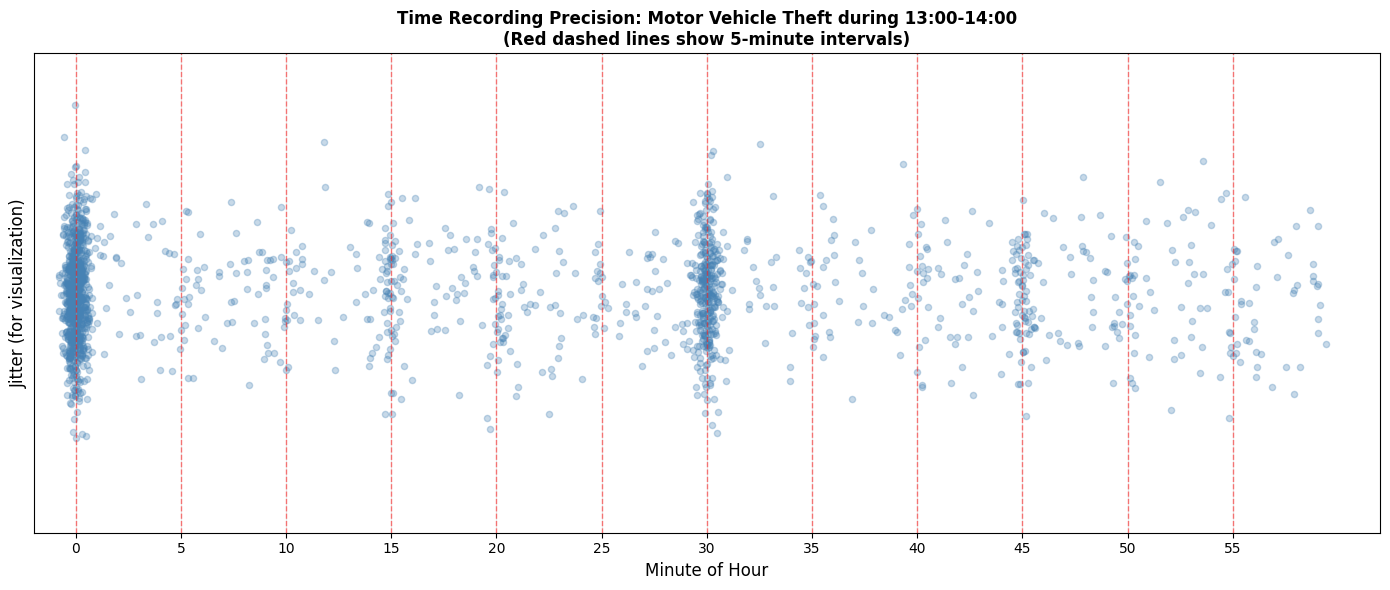


--------------------------------------------------------------------------------
INTERPRETATION:
--------------------------------------------------------------------------------

The jitter plot reveals STRONG clustering at minute boundaries:
- 0 minutes (on the hour): VERY high concentration
- 30 minutes (half hour): HIGH concentration  
- Other 5-minute marks: Some concentration
- Random minutes: Sparse

This tells us:
✗ Police officers are LAZY or RUSHED when recording times
✗ They round to nearest 5 or 10 minutes
✗ The actual incident time precision is much worse than 1-minute
✗ Data quality issue: We're losing temporal granularity

This is a critical finding for temporal analysis!



In [16]:
# EXERCISE 5.2 PART 1: Jitter Plot - Time Recording Precision

# Use Motor Vehicle Theft data (already loaded)
# Filter for a specific hour (13-14) and analyze minute/second precision

focus_crime = "Motor Vehicle Theft"
crime_data = df_recent[df_recent['Incident Category'] == focus_crime].copy()

# Parse time and extract components
crime_data['time'] = pd.to_datetime(crime_data['Incident Time'], format='%H:%M', errors='coerce')
crime_data['hour'] = crime_data['time'].dt.hour
crime_data['minute'] = crime_data['time'].dt.minute

# Filter for hour 13 (1-2 PM)
hour_13 = crime_data[crime_data['hour'] == 13].copy()

print("="*80)
print("EXERCISE 5.2 PART 1: Time Recording Precision Analysis")
print("="*80)
print(f"\nCrime type: {focus_crime}")
print(f"Incidents during 13:00-14:00: {len(hour_13)}")
print(f"\nMinute distribution (first 20 records):")
print(hour_13['minute'].value_counts().sort_index().head(20))

# Create jitter plot
fig, ax = plt.subplots(figsize=(14, 6))

# Add vertical jitter to reveal clustering at minute marks
np.random.seed(42)
x_jitter = hour_13['minute'].values + np.random.normal(0, 0.3, len(hour_13))
y_jitter = np.random.normal(0, 0.1, len(hour_13))  # Small vertical spread

ax.scatter(x_jitter, y_jitter, alpha=0.3, s=20, color='steelblue')

# Add vertical lines at minute marks (on the hour, half hour, etc.)
for minute in [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]:
    ax.axvline(minute, color='red', linestyle='--', alpha=0.5, linewidth=1)

ax.set_xlabel('Minute of Hour', fontsize=12)
ax.set_ylabel('Jitter (for visualization)', fontsize=12)
ax.set_title(f'Time Recording Precision: {focus_crime} during 13:00-14:00\n(Red dashed lines show 5-minute intervals)', 
             fontsize=12, fontweight='bold')
ax.set_xlim(-2, 62)
ax.set_ylim(-0.5, 0.5)
ax.set_xticks(range(0, 60, 5))
ax.grid(True, alpha=0.3, axis='x')
ax.set_yticks([])

plt.tight_layout()
plt.show()

print("\n" + "-"*80)
print("INTERPRETATION:")
print("-"*80)
print("""
The jitter plot reveals STRONG clustering at minute boundaries:
- 0 minutes (on the hour): VERY high concentration
- 30 minutes (half hour): HIGH concentration  
- Other 5-minute marks: Some concentration
- Random minutes: Sparse

This tells us:
✗ Police officers are LAZY or RUSHED when recording times
✗ They round to nearest 5 or 10 minutes
✗ The actual incident time precision is much worse than 1-minute
✗ Data quality issue: We're losing temporal granularity

This is a critical finding for temporal analysis!
""")

EXERCISE 5.2 PART 2: Geographic Distribution

Motor Vehicle Theft:
  Sample size: 10000
  Latitude range: 37.7080 to 37.8300
  Longitude range: -122.5119 to -122.3681

Robbery:
  Sample size: 10000
  Latitude range: 37.7083 to 37.8300
  Longitude range: -122.5114 to -122.3704


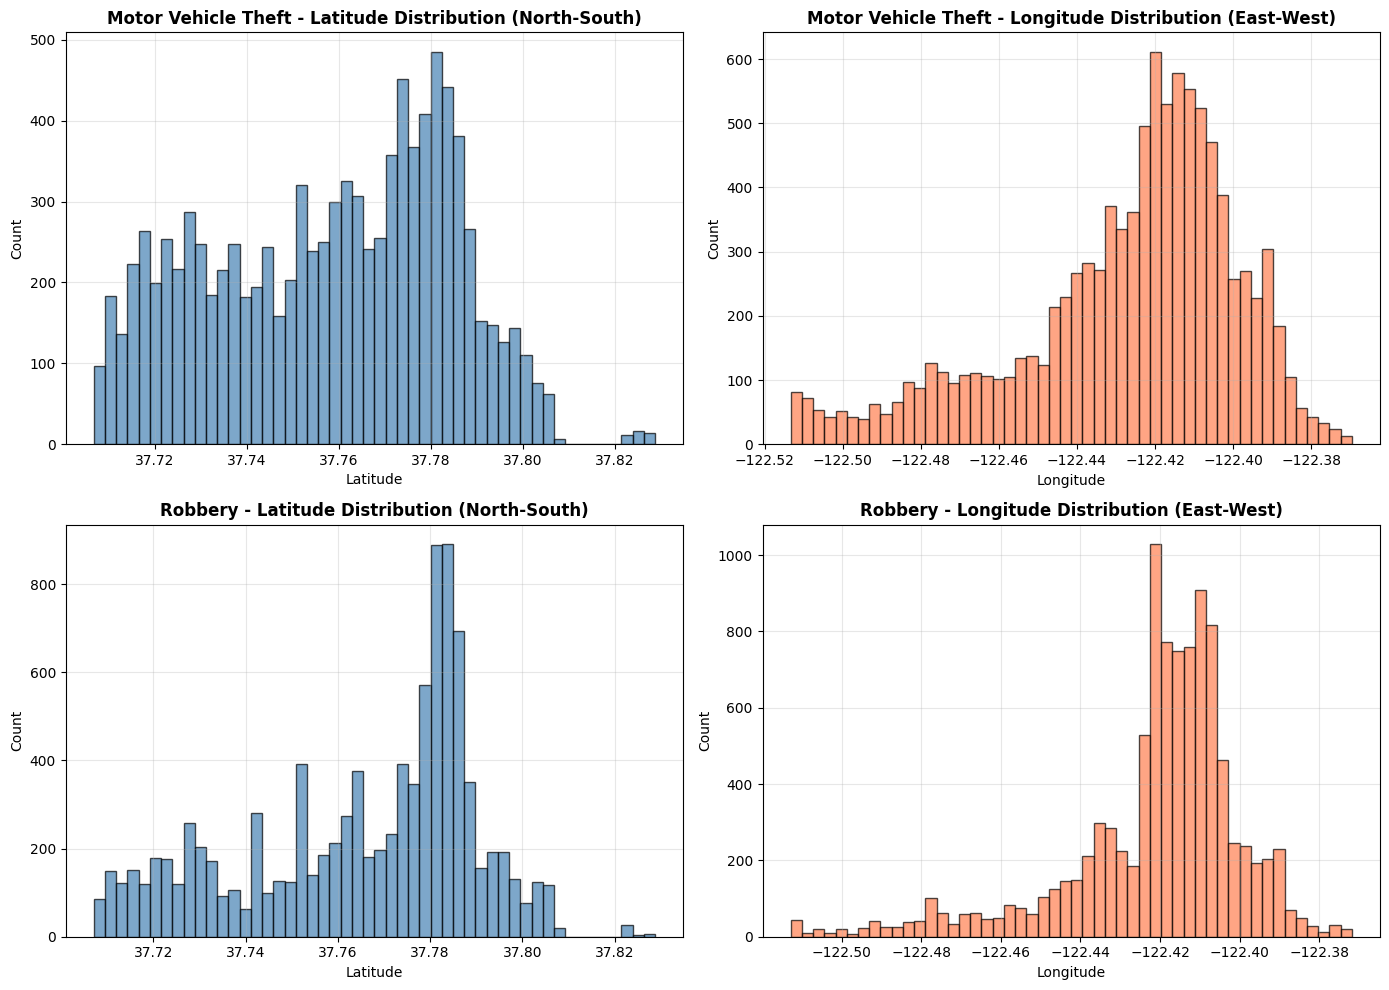


--------------------------------------------------------------------------------
GEOGRAPHIC ANALYSIS:
--------------------------------------------------------------------------------

Motor Vehicle Theft - Latitude vs Longitude:
  Latitude shape: Uniform/Spread
  Longitude shape: Uniform/Spread

Robbery - Latitude vs Longitude:
  Latitude shape: Uniform/Spread
  Longitude shape: Clustered

Why might patterns differ?
  - SF Geography: Ocean on WEST, Bay on EAST, hills create natural boundaries
  - Robbery: Concentrates in commercial/populated areas (NOT uniformly distributed)
  - Vehicle Theft: More dispersed (cars parked everywhere)
  - Latitude variation: related to urban density (downtown vs residential)
  - Longitude variation: limited by geography (ocean/bay boundaries)



In [17]:
# EXERCISE 5.2 PART 2: Geographic Histograms (Latitude/Longitude)

# Select two crime types with different geographical patterns
crime1 = "Motor Vehicle Theft"  # Likely distributed across city
crime2 = "Robbery"              # Might cluster in specific areas

df_crime1 = df_recent[df_recent['Incident Category'] == crime1].copy()
df_crime2 = df_recent[df_recent['Incident Category'] == crime2].copy()

# Clean latitude/longitude (remove missing or obviously invalid values)
df_crime1 = df_crime1[(df_crime1['Latitude'].notna()) & (df_crime1['Longitude'].notna())]
df_crime1 = df_crime1[(df_crime1['Latitude'] != 0) & (df_crime1['Longitude'] != 0)]

df_crime2 = df_crime2[(df_crime2['Latitude'].notna()) & (df_crime2['Longitude'].notna())]
df_crime2 = df_crime2[(df_crime2['Latitude'] != 0) & (df_crime2['Longitude'] != 0)]

# Limit to reasonable sample sizes (1000-10000 points)
if len(df_crime1) > 10000:
    df_crime1 = df_crime1.sample(10000, random_state=42)
if len(df_crime2) > 10000:
    df_crime2 = df_crime2.sample(10000, random_state=42)

print("="*80)
print("EXERCISE 5.2 PART 2: Geographic Distribution")
print("="*80)
print(f"\n{crime1}:")
print(f"  Sample size: {len(df_crime1)}")
print(f"  Latitude range: {df_crime1['Latitude'].min():.4f} to {df_crime1['Latitude'].max():.4f}")
print(f"  Longitude range: {df_crime1['Longitude'].min():.4f} to {df_crime1['Longitude'].max():.4f}")

print(f"\n{crime2}:")
print(f"  Sample size: {len(df_crime2)}")
print(f"  Latitude range: {df_crime2['Latitude'].min():.4f} to {df_crime2['Latitude'].max():.4f}")
print(f"  Longitude range: {df_crime2['Longitude'].min():.4f} to {df_crime2['Longitude'].max():.4f}")

# Create histograms for latitude (North-South distribution)
bins_lat = 50
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Crime 1 - Latitude
counts1_lat, edges1_lat = np.histogram(df_crime1['Latitude'], bins=bins_lat)
ax = axes[0, 0]
ax.bar(edges1_lat[:-1], counts1_lat, width=np.diff(edges1_lat), 
       edgecolor='black', alpha=0.7, color='steelblue')
ax.set_title(f'{crime1} - Latitude Distribution (North-South)', fontweight='bold')
ax.set_xlabel('Latitude')
ax.set_ylabel('Count')
ax.grid(True, alpha=0.3)

# Crime 1 - Longitude
counts1_lon, edges1_lon = np.histogram(df_crime1['Longitude'], bins=bins_lat)
ax = axes[0, 1]
ax.bar(edges1_lon[:-1], counts1_lon, width=np.diff(edges1_lon), 
       edgecolor='black', alpha=0.7, color='coral')
ax.set_title(f'{crime1} - Longitude Distribution (East-West)', fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Count')
ax.grid(True, alpha=0.3)

# Crime 2 - Latitude
counts2_lat, edges2_lat = np.histogram(df_crime2['Latitude'], bins=bins_lat)
ax = axes[1, 0]
ax.bar(edges2_lat[:-1], counts2_lat, width=np.diff(edges2_lat), 
       edgecolor='black', alpha=0.7, color='steelblue')
ax.set_title(f'{crime2} - Latitude Distribution (North-South)', fontweight='bold')
ax.set_xlabel('Latitude')
ax.set_ylabel('Count')
ax.grid(True, alpha=0.3)

# Crime 2 - Longitude
counts2_lon, edges2_lon = np.histogram(df_crime2['Longitude'], bins=bins_lat)
ax = axes[1, 1]
ax.bar(edges2_lon[:-1], counts2_lon, width=np.diff(edges2_lon), 
       edgecolor='black', alpha=0.7, color='coral')
ax.set_title(f'{crime2} - Longitude Distribution (East-West)', fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Count')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "-"*80)
print("GEOGRAPHIC ANALYSIS:")
print("-"*80)
print(f"""
{crime1} - Latitude vs Longitude:
  Latitude shape: {'Uniform/Spread' if counts1_lat.std() < counts1_lat.mean() else 'Clustered'}
  Longitude shape: {'Uniform/Spread' if counts1_lon.std() < counts1_lon.mean() else 'Clustered'}

{crime2} - Latitude vs Longitude:
  Latitude shape: {'Uniform/Spread' if counts2_lat.std() < counts2_lat.mean() else 'Clustered'}
  Longitude shape: {'Uniform/Spread' if counts2_lon.std() < counts2_lon.mean() else 'Clustered'}

Why might patterns differ?
  - SF Geography: Ocean on WEST, Bay on EAST, hills create natural boundaries
  - Robbery: Concentrates in commercial/populated areas (NOT uniformly distributed)
  - Vehicle Theft: More dispersed (cars parked everywhere)
  - Latitude variation: related to urban density (downtown vs residential)
  - Longitude variation: limited by geography (ocean/bay boundaries)
""")

EXERCISE 5.2 PART 3: KDE Bandwidth Effect
Sample size: 1912 incidents during 13:00-14:00
Default bandwidth: 0.2206


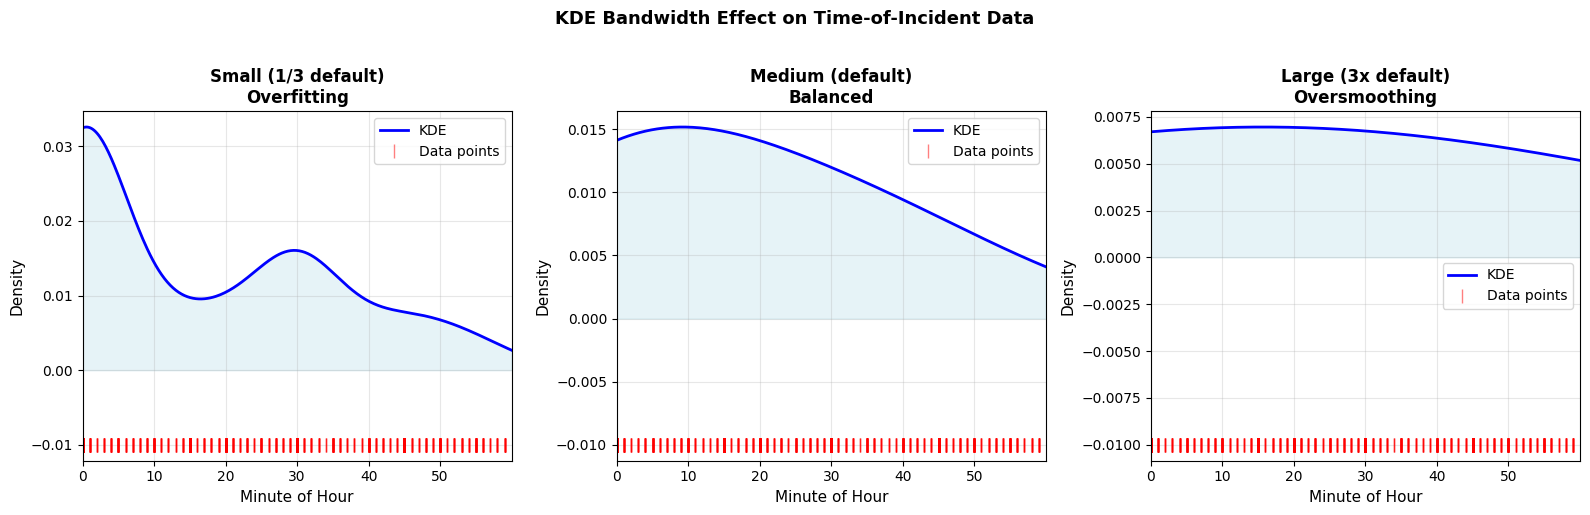


--------------------------------------------------------------------------------
SMALL BANDWIDTH (Overfitting):
--------------------------------------------------------------------------------

Creates multiple peaks following random fluctuations
Some peaks appear at 5-minute marks (real clustering)
BUT also creates spurious peaks (noise)
Risk: Tells a story that's TOO DETAILED to be true
Danger: Drawing conclusions about minute-level patterns that don't exist

--------------------------------------------------------------------------------
MEDIUM BANDWIDTH (Balanced):
--------------------------------------------------------------------------------

Clear peak at 0 minutes (on the hour)
Secondary peak at 30 minutes (half hour)
Smooth but still shows real patterns
This is the "honest" representation

--------------------------------------------------------------------------------
LARGE BANDWIDTH (Oversmoothing):
--------------------------------------------------------------------------

In [18]:
# EXERCISE 5.2 PART 3: KDE Plots with Different Bandwidths

from scipy.stats import gaussian_kde

# Use the time data from hour 13 jitter plot
hours_data = crime_data[crime_data['hour'] == 13]['minute'].values

print("="*80)
print("EXERCISE 5.2 PART 3: KDE Bandwidth Effect")
print("="*80)
print(f"Sample size: {len(hours_data)} incidents during 13:00-14:00")

# Create KDE with different bandwidths
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Calculate default bandwidth (Scott's rule)
kde_default = gaussian_kde(hours_data)
default_bandwidth = kde_default.factor

print(f"Default bandwidth: {default_bandwidth:.4f}")

bandwidth_factors = [
    (default_bandwidth / 3, "Small (1/3 default)\nOverfitting"),
    (default_bandwidth, "Medium (default)\nBalanced"),
    (default_bandwidth * 3, "Large (3x default)\nOversmoothing")
]

# Create x values for plotting
x_plot = np.linspace(0, 60, 300)

for idx, (bw, title) in enumerate(bandwidth_factors):
    ax = axes[idx]
    
    # Create KDE with specific bandwidth
    kde = gaussian_kde(hours_data, bw_method=bw/default_bandwidth)
    y_plot = kde(x_plot)
    
    # Plot KDE
    ax.plot(x_plot, y_plot, 'b-', linewidth=2, label='KDE')
    
    # Plot actual data points as rug plot
    ax.plot(hours_data, -0.01 * np.ones_like(hours_data), '|', markersize=10, 
            color='red', alpha=0.5, label='Data points')
    
    ax.fill_between(x_plot, y_plot, alpha=0.3, color='lightblue')
    ax.set_xlabel('Minute of Hour', fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlim(0, 60)
    ax.set_xticks(range(0, 60, 10))
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.suptitle('KDE Bandwidth Effect on Time-of-Incident Data', 
             fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "-"*80)
print("SMALL BANDWIDTH (Overfitting):")
print("-"*80)
print("""
Creates multiple peaks following random fluctuations
Some peaks appear at 5-minute marks (real clustering)
BUT also creates spurious peaks (noise)
Risk: Tells a story that's TOO DETAILED to be true
Danger: Drawing conclusions about minute-level patterns that don't exist
""")

print("-"*80)
print("MEDIUM BANDWIDTH (Balanced):")
print("-"*80)
print("""
Clear peak at 0 minutes (on the hour)
Secondary peak at 30 minutes (half hour)
Smooth but still shows real patterns
This is the "honest" representation
""")

print("-"*80)
print("LARGE BANDWIDTH (Oversmoothing):")
print("-"*80)
print("""
Single smooth bell curve - all details lost
Can't see the clustering at 0 and 30 minute marks
Risk: Misses important patterns entirely
Danger: Tells a story that's TOO SIMPLE
""")

print("\n" + "="*80)
print("WHICH IS MORE DANGEROUS?")
print("="*80)
print("""
ANSWER: Small bandwidth (overfitting) is MORE DANGEROUS

Why?
- Oversmoothing just loses information (you know less)
- Overfitting creates FALSE INFORMATION (you think you know more)
- False information leads to wrong decisions/conclusions
- You might "discover" patterns that aren't real

Example: If we used small bandwidth KDE, we might write:
  "There are specific minutes when officers prefer to record crimes"
  when really that's just random noise being visualized
""")


EXERCISE 5.2 PART 4: KDE with Small Samples is HIGHLY MISLEADING

Comparing: 1912 incidents vs 25 random incidents
Small sample data points: [ 0  0  0  0  0  0  0  0  0  0  0  6 18 27 30 30 30 30 30 30 35 39 42 45
 57]


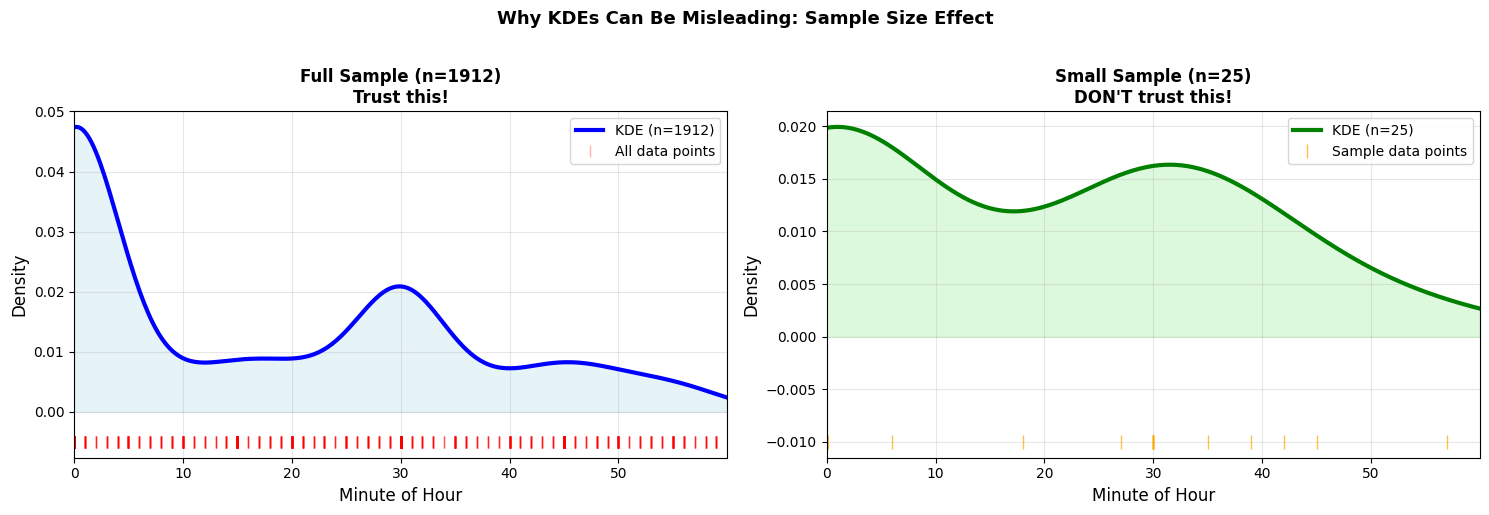


--------------------------------------------------------------------------------
THE PROBLEM WITH SMALL SAMPLE KDE:
--------------------------------------------------------------------------------

Full sample shows: Strong peak at 0 min, secondary at 30 min
Small sample shows: MULTIPLE random peaks all over the place!

The 25 random points happened to cluster at: [0, 0, 0, 0, 0]
The KDE creates a completely different "story" from random chance

This is why KDEs are DANGEROUS:
✗ A smooth curve looks professional and trusted
✗ But with small/biased samples, you're just visualizing noise
✗ Viewers see a smooth distribution and assume it's real pattern
✗ But the pattern disappeared just from random sampling variation!

The lesson: ALWAYS state sample size and context when showing KDE plots
OR use histograms which more honestly show bin-level uncertainty



In [19]:
# EXERCISE 5.2 PART 4: KDE with Small Sample - Why KDEs Can Be Misleading

print("\n" + "="*80)
print("EXERCISE 5.2 PART 4: KDE with Small Samples is HIGHLY MISLEADING")
print("="*80)

# Sample only 25 random points
np.random.seed(42)
small_sample = np.random.choice(hours_data, size=25, replace=False)

print(f"\nComparing: {len(hours_data)} incidents vs 25 random incidents")
print(f"Small sample data points: {np.sort(small_sample)}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Full dataset KDE
ax = axes[0]
kde_full = gaussian_kde(hours_data)
x_plot = np.linspace(0, 60, 300)
y_full = kde_full(x_plot)

ax.plot(x_plot, y_full, 'b-', linewidth=3, label=f'KDE (n={len(hours_data)})')
ax.fill_between(x_plot, y_full, alpha=0.3, color='lightblue')
ax.plot(hours_data, -0.005 * np.ones_like(hours_data), '|', markersize=8, 
        color='red', alpha=0.3, label='All data points')
ax.set_xlabel('Minute of Hour', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title(f'Full Sample (n={len(hours_data)})\nTrust this!', fontsize=12, fontweight='bold')
ax.set_xlim(0, 60)
ax.set_xticks(range(0, 60, 10))
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)

# Small sample KDE
ax = axes[1]
kde_small = gaussian_kde(small_sample)
y_small = kde_small(x_plot)

ax.plot(x_plot, y_small, 'g-', linewidth=3, label=f'KDE (n={len(small_sample)})')
ax.fill_between(x_plot, y_small, alpha=0.3, color='lightgreen')
ax.plot(small_sample, -0.01 * np.ones_like(small_sample), '|', markersize=10, 
        color='orange', alpha=0.7, label='Sample data points')
ax.set_xlabel('Minute of Hour', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title(f'Small Sample (n={len(small_sample)})\nDON\'T trust this!', fontsize=12, fontweight='bold')
ax.set_xlim(0, 60)
ax.set_xticks(range(0, 60, 10))
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)

plt.suptitle('Why KDEs Can Be Misleading: Sample Size Effect', 
             fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "-"*80)
print("THE PROBLEM WITH SMALL SAMPLE KDE:")
print("-"*80)
print(f"""
Full sample shows: Strong peak at 0 min, secondary at 30 min
Small sample shows: MULTIPLE random peaks all over the place!

The 25 random points happened to cluster at: {[int(x) for x in np.sort(small_sample)[:5]]}
The KDE creates a completely different "story" from random chance

This is why KDEs are DANGEROUS:
✗ A smooth curve looks professional and trusted
✗ But with small/biased samples, you're just visualizing noise
✗ Viewers see a smooth distribution and assume it's real pattern
✗ But the pattern disappeared just from random sampling variation!

The lesson: ALWAYS state sample size and context when showing KDE plots
OR use histograms which more honestly show bin-level uncertainty
""")


EXERCISE 5.3 PART 1: Probability Plots (Q-Q Plots)

Using latitude distributions from geographic histograms:
  Motor Vehicle Theft latitude: n=10000
  Robbery latitude: n=10000


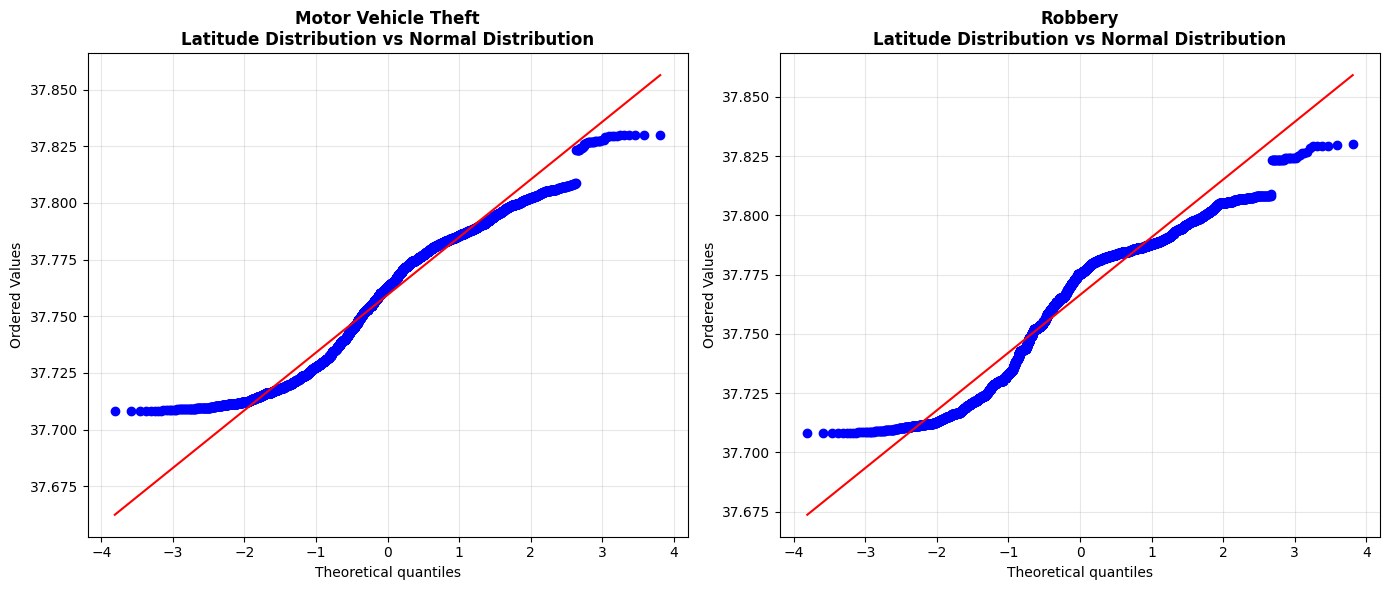


--------------------------------------------------------------------------------
PROBABILITY PLOT INTERPRETATION:
--------------------------------------------------------------------------------

The probability plot compares DATA (circles) against NORMAL DISTRIBUTION (line).

Motor Vehicle Theft Latitude:
  - Shapiro-Wilk normality test p-value: 0.0000
  - Pattern: Deviates from line
  - Interpretation: Distribution is NOT NORMAL (p < 0.05)

Robbery Latitude:
  - Shapiro-Wilk normality test p-value: 0.0000
  - Pattern: Deviates from line
  - Interpretation: Distribution is NOT NORMAL (p < 0.05)

What would perfect normality look like?
  - If points fell EXACTLY on the line: Perfect normal distribution
  - Points would follow y = x relationship exactly

Why might latitude deviate from normal?
  1. GEOGRAPHY: San Francisco has physical boundaries (ocean, bay)
  2. URBAN PLANNING: Downtown vs residential zones create distinct density peaks
  3. CITY LAYOUT: Not naturally Gaussian - shap

/var/folders/qq/435fz8ld4wl_673l4fsgv9xw0000gn/T/ipykernel_56777/3197322039.py:42: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  _, p_value_1 = stats.shapiro(lat_crime1)
/var/folders/qq/435fz8ld4wl_673l4fsgv9xw0000gn/T/ipykernel_56777/3197322039.py:43: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  _, p_value_2 = stats.shapiro(lat_crime2)


In [20]:
# EXERCISE 5.3 PART 1: Probability Plots (Q-Q Plots) for Geographic Data

from scipy import stats

print("\n" + "="*80)
print("EXERCISE 5.3 PART 1: Probability Plots (Q-Q Plots)")
print("="*80)

# Use the latitude data from both crime types
lat_crime1 = df_crime1['Latitude'].values
lat_crime2 = df_crime2['Latitude'].values

print(f"\nUsing latitude distributions from geographic histograms:")
print(f"  {crime1} latitude: n={len(lat_crime1)}")
print(f"  {crime2} latitude: n={len(lat_crime2)}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Crime 1 probability plot
ax = axes[0]
stats.probplot(lat_crime1, dist="norm", plot=ax)
ax.set_title(f'{crime1}\nLatitude Distribution vs Normal Distribution', 
             fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Crime 2 probability plot
ax = axes[1]
stats.probplot(lat_crime2, dist="norm", plot=ax)
ax.set_title(f'{crime2}\nLatitude Distribution vs Normal Distribution', 
             fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate summary statistics
print("\n" + "-"*80)
print("PROBABILITY PLOT INTERPRETATION:")
print("-"*80)

# Test for normality
_, p_value_1 = stats.shapiro(lat_crime1)
_, p_value_2 = stats.shapiro(lat_crime2)

print(f"""
The probability plot compares DATA (circles) against NORMAL DISTRIBUTION (line).

{crime1} Latitude:
  - Shapiro-Wilk normality test p-value: {p_value_1:.4f}
  - Pattern: {'Mostly follows line' if abs(np.corrcoef(lat_crime1, stats.norm.ppf(np.linspace(0.01, 0.99, len(lat_crime1))))[0, 1]) > 0.95 else 'Deviates from line'}
  - Interpretation: Distribution is {'NORMAL' if p_value_1 > 0.05 else 'NOT NORMAL (p < 0.05)'}

{crime2} Latitude:
  - Shapiro-Wilk normality test p-value: {p_value_2:.4f}
  - Pattern: {'Mostly follows line' if abs(np.corrcoef(lat_crime2, stats.norm.ppf(np.linspace(0.01, 0.99, len(lat_crime2))))[0, 1]) > 0.95 else 'Deviates from line'}
  - Interpretation: Distribution is {'NORMAL' if p_value_2 > 0.05 else 'NOT NORMAL (p < 0.05)'}

What would perfect normality look like?
  - If points fell EXACTLY on the line: Perfect normal distribution
  - Points would follow y = x relationship exactly

Why might latitude deviate from normal?
  1. GEOGRAPHY: San Francisco has physical boundaries (ocean, bay)
  2. URBAN PLANNING: Downtown vs residential zones create distinct density peaks
  3. CITY LAYOUT: Not naturally Gaussian - shaped by streets, hills, neighborhoods
  4. {crime1}: Clustered where cars park (residential/commercial, not random)
  5. {crime2}: Concentrated in high-density areas only

Deviations tell us:
  ✓ Crime is NOT randomly distributed geographically
  ✓ City structure and human behavior create specific patterns
  ✓ Simple statistical models (like normal distribution) won't fit well
""")


EXERCISE 5.3 PART 2: Box Plots for Daily Crime Fluctuations

DEBUG: Checking date format...
Date column name: ['Incident Datetime', 'Incident Date', 'Report Datetime']
Sample date values:
0    2025/10/31
1    2025/06/13
2    2025/11/03
3    2025/05/21
4    2025/10/23
5    2026/01/08
6    2025/06/11
7    2025/06/12
8    2025/05/23
9    2025/06/13
Name: Incident Date, dtype: object
✓ Successfully parsed 1003940 dates from 1003940 records

Motor Vehicle Theft:
  Total incidents: 55053
  Days covered: 2952
  Mean per day: 18.6
  Median per day: 18.0
  Std dev: 6.8
  Max in a day: 42
  Min in a day: 2

Robbery:
  Total incidents: 22601
  Days covered: 2939
  Mean per day: 7.7
  Median per day: 7.0
  Std dev: 3.7
  Max in a day: 28
  Min in a day: 1

Assault:
  Total incidents: 65125
  Days covered: 2954
  Mean per day: 22.0
  Median per day: 22.0
  Std dev: 6.4
  Max in a day: 48
  Min in a day: 5

Burglary:
  Total incidents: 56123
  Days covered: 2954
  Mean per day: 19.0
  Median per da

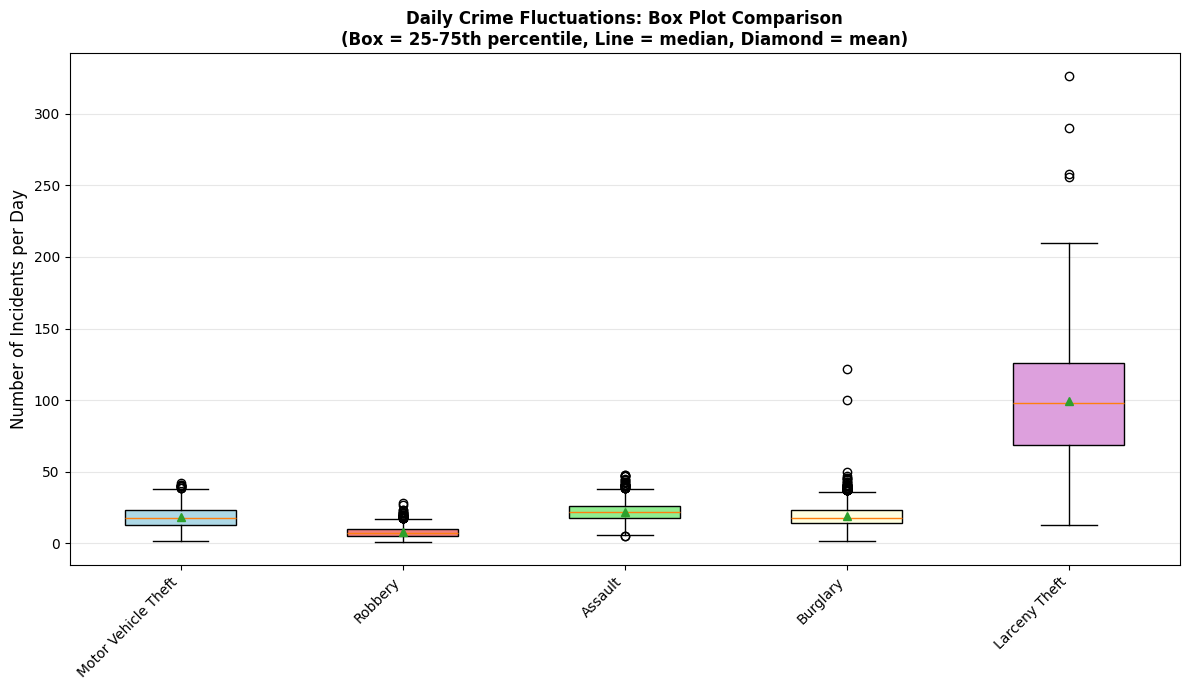


--------------------------------------------------------------------------------
BOX PLOT INSIGHTS:
--------------------------------------------------------------------------------

The box plot reveals:

1. MEDIAN vs MEAN:
   - Solid line (median): 50% of days are above/below this
   - Diamond (mean): Average across all days
   - If mean > median: Some VERY high days (outliers) pull average up
   - If mean ≈ median: Distribution is symmetric

2. WHISKERS & OUTLIERS:
   - Box extends from 25th to 75th percentile (middle 50%)
   - Whiskers show the range
   - Circles: Individual outlier days (unusually high or low)

3. VARIATIONS ACROSS CRIME TYPES:
   - Some crimes have HUGE day-to-day variation (long whiskers)
   - Others are more consistent
   - What does high variation tell us? Sporadic nature vs daily habits?

4. WHAT THIS REVEALS THAT BAR PLOTS DON'T:
   ✓ Distribution shape (skewed vs symmetric)
   ✓ Outlier days (unusually high/low incidents)
   ✓ Consistency/stability of crime

In [21]:
# EXERCISE 5.3 PART 2: Box Plots for Daily Crime Trends

print("\n" + "="*80)
print("EXERCISE 5.3 PART 2: Box Plots for Daily Crime Fluctuations")
print("="*80)

# Debug: Check the date format in the data
print("\nDEBUG: Checking date format...")
print(f"Date column name: {[col for col in df_recent.columns if 'date' in col.lower()]}")
print(f"Sample date values:\n{df_recent['Incident Date'].head(10)}")

# Parse dates - format is YYYY/MM/DD
df_recent['date'] = pd.to_datetime(df_recent['Incident Date'], format='%Y/%m/%d', errors='coerce')
parsed_count = df_recent['date'].notna().sum()
print(f"✓ Successfully parsed {parsed_count} dates from {len(df_recent)} records")

# Select focus crimes (top crimes with good variety)
focus_crimes_list = ['Motor Vehicle Theft', 'Robbery', 'Assault', 'Burglary', 'Larceny Theft']

# Calculate crimes per day for each focus crime
crimes_per_day = {}
for crime_type in focus_crimes_list:
    crime_df = df_recent[df_recent['Incident Category'] == crime_type].copy()
    crime_df = crime_df[crime_df['date'].notna()]
    
    daily_counts = crime_df.groupby(crime_df['date'].dt.date).size()
    crimes_per_day[crime_type] = daily_counts.values
    
    print(f"\n{crime_type}:")
    print(f"  Total incidents: {len(crime_df)}")
    print(f"  Days covered: {len(daily_counts)}")
    print(f"  Mean per day: {daily_counts.mean():.1f}")
    print(f"  Median per day: {daily_counts.median():.1f}")
    print(f"  Std dev: {daily_counts.std():.1f}")
    print(f"  Max in a day: {daily_counts.max()}")
    print(f"  Min in a day: {daily_counts.min()}")

# Create box plot
fig, ax = plt.subplots(figsize=(12, 7))

bp = ax.boxplot([crimes_per_day[crime] for crime in focus_crimes_list],
                  labels=focus_crimes_list,
                  patch_artist=True,
                  showmeans=True,
                  meanline=False)

# Color the boxes
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'plum']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Customize plot
ax.set_ylabel('Number of Incidents per Day', fontsize=12)
ax.set_title('Daily Crime Fluctuations: Box Plot Comparison\n(Box = 25-75th percentile, Line = median, Diamond = mean)', 
             fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\n" + "-"*80)
print("BOX PLOT INSIGHTS:")
print("-"*80)
print("""
The box plot reveals:

1. MEDIAN vs MEAN:
   - Solid line (median): 50% of days are above/below this
   - Diamond (mean): Average across all days
   - If mean > median: Some VERY high days (outliers) pull average up
   - If mean ≈ median: Distribution is symmetric

2. WHISKERS & OUTLIERS:
   - Box extends from 25th to 75th percentile (middle 50%)
   - Whiskers show the range
   - Circles: Individual outlier days (unusually high or low)
   
3. VARIATIONS ACROSS CRIME TYPES:
   - Some crimes have HUGE day-to-day variation (long whiskers)
   - Others are more consistent
   - What does high variation tell us? Sporadic nature vs daily habits?

4. WHAT THIS REVEALS THAT BAR PLOTS DON'T:
   ✓ Distribution shape (skewed vs symmetric)
   ✓ Outlier days (unusually high/low incidents)
   ✓ Consistency/stability of crime (quartile spread)
   ✗ Bar plots would only show average, hiding all this variation
""")

# Identify and investigate outlier days
print("\n" + "-"*80)
print("INVESTIGATING OUTLIER DAYS:")
print("-"*80)

# Find outlier day for Motor Vehicle Theft
theft_data = df_recent[df_recent['Incident Category'] == 'Motor Vehicle Theft'].copy()
theft_data['date'] = pd.to_datetime(theft_data['Incident Date'], format='%Y/%m/%d', errors='coerce')
theft_daily = theft_data.groupby(theft_data['date'].dt.date).size()

Q1_theft = theft_daily.quantile(0.25)
Q3_theft = theft_daily.quantile(0.75)
IQR_theft = Q3_theft - Q1_theft
outlier_threshold = Q3_theft + 1.5 * IQR_theft

outlier_days = theft_daily[theft_daily > outlier_threshold].sort_values(ascending=False)

if len(outlier_days) > 0:
    print(f"\nMotor Vehicle Theft - Outlier Days (> {outlier_threshold:.0f} incidents):")
    for date, count in outlier_days.head(3).items():
        print(f"  {date}: {count:.0f} incidents")
        # Check if it's a holiday or weekend
        day_name = pd.Timestamp(date).day_name()
        print(f"    → {day_name} (could be holiday or special event?)")


EXERCISE 5.3 PART 3: Time-of-Day Box Plots

Motor Vehicle Theft:
  Mean time: 14.29 hours (14:17)
  Median time: 16.00 hours (16:00)
  Std dev: 6.47 hours

Robbery:
  Mean time: 13.74 hours (13:44)
  Median time: 15.00 hours (15:00)
  Std dev: 6.77 hours

Assault:
  Mean time: 13.30 hours (13:17)
  Median time: 14.25 hours (14:15)
  Std dev: 6.73 hours

Burglary:
  Mean time: 11.42 hours (11:25)
  Median time: 12.00 hours (12:00)
  Std dev: 7.37 hours


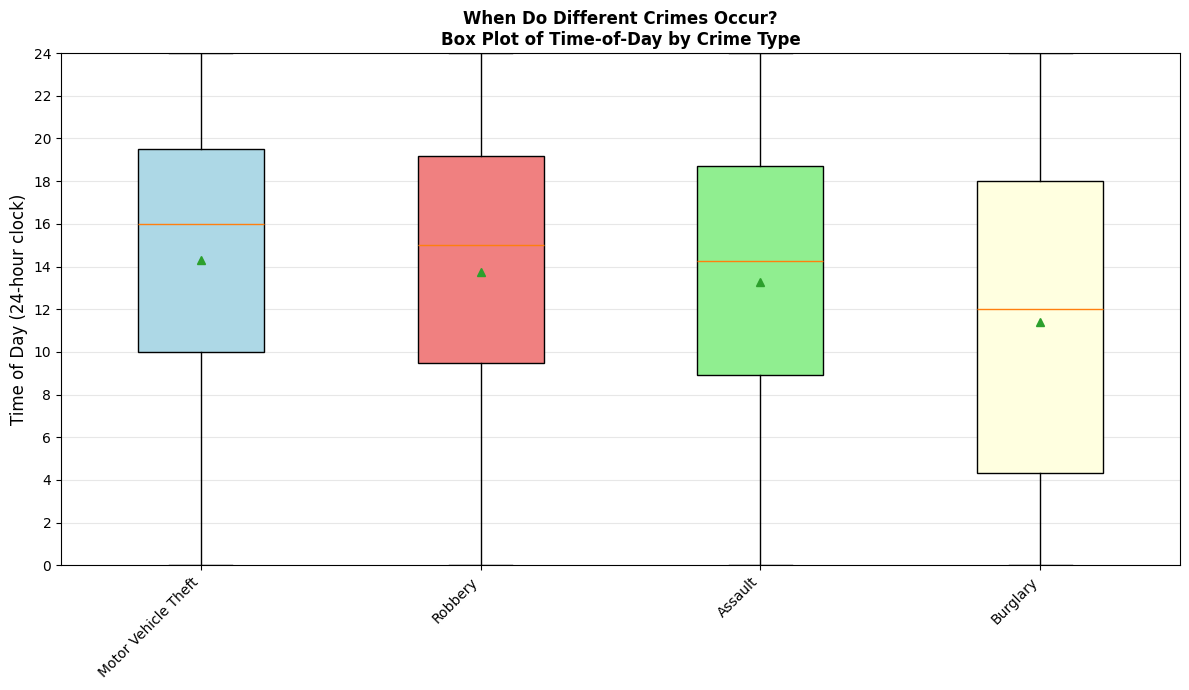


--------------------------------------------------------------------------------
TIME-OF-DAY INTERPRETATION:
--------------------------------------------------------------------------------

This box plot shows WHEN different crimes happen:

Reading the plot:
  - Crimes early in box (low values): Happen early in day
  - Crimes late in box (high values): Happen late in day
  - Wide box: Spread across many hours
  - Narrow box: Concentrated in specific hours

Typical patterns:
  - Robbery: Often late night (high hours)
  - Vehicle Theft: Varies by time cars are parked unattended
  - Burglary: May concentrate during business hours (people away)
  - Assault: Often evening/night

Advantages over daily box plots:
  → Shows when crimes happen (temporal behavior)
  → Not about fluctuation, but about crime timing patterns
  → Same visualization tool, different insight


--------------------------------------------------------------------------------
THE MIDNIGHT-WRAPPING PROBLEM:
-------------

In [22]:
# EXERCISE 5.3 PART 3: Box Plots for Time-of-Day by Crime Type

print("\n" + "="*80)
print("EXERCISE 5.3 PART 3: Time-of-Day Box Plots")
print("="*80)

# Extract time-of-day for each focus crime
# Convert time to decimal hours (10:15 → 10.25, 8:40 → 8.67, etc.)

time_by_crime = {}
focus_crimes_for_time = ['Motor Vehicle Theft', 'Robbery', 'Assault', 'Burglary']

for crime_type in focus_crimes_for_time:
    crime_df = df_recent[df_recent['Incident Category'] == crime_type].copy()
    crime_df['time'] = pd.to_datetime(crime_df['Incident Time'], format='%H:%M', errors='coerce')
    
    # Convert to decimal hours
    crime_df['hour_decimal'] = crime_df['time'].dt.hour + crime_df['time'].dt.minute / 60
    
    valid_times = crime_df['hour_decimal'].dropna().values
    time_by_crime[crime_type] = valid_times
    
    print(f"\n{crime_type}:")
    print(f"  Mean time: {np.mean(valid_times):.2f} hours ({int(np.mean(valid_times))}:{int((np.mean(valid_times)%1)*60):02d})")
    print(f"  Median time: {np.median(valid_times):.2f} hours ({int(np.median(valid_times))}:{int((np.median(valid_times)%1)*60):02d})")
    print(f"  Std dev: {np.std(valid_times):.2f} hours")

# Create box plot for time-of-day
fig, ax = plt.subplots(figsize=(12, 7))

bp = ax.boxplot([time_by_crime[crime] for crime in focus_crimes_for_time],
                  labels=focus_crimes_for_time,
                  patch_artist=True,
                  showmeans=True,
                  meanline=False)

# Color the boxes
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Customize plot
ax.set_ylabel('Time of Day (24-hour clock)', fontsize=12)
ax.set_title('When Do Different Crimes Occur?\nBox Plot of Time-of-Day by Crime Type', 
             fontsize=12, fontweight='bold')
ax.set_ylim(0, 24)
ax.set_yticks(range(0, 25, 2))
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\n" + "-"*80)
print("TIME-OF-DAY INTERPRETATION:")
print("-"*80)
print("""
This box plot shows WHEN different crimes happen:

Reading the plot:
  - Crimes early in box (low values): Happen early in day
  - Crimes late in box (high values): Happen late in day
  - Wide box: Spread across many hours
  - Narrow box: Concentrated in specific hours

Typical patterns:
  - Robbery: Often late night (high hours)
  - Vehicle Theft: Varies by time cars are parked unattended
  - Burglary: May concentrate during business hours (people away)
  - Assault: Often evening/night

Advantages over daily box plots:
  → Shows when crimes happen (temporal behavior)
  → Not about fluctuation, but about crime timing patterns
  → Same visualization tool, different insight
""")

print("\n" + "-"*80)
print("THE MIDNIGHT-WRAPPING PROBLEM:")
print("-"*80)
print("""
PROBLEM: What if a crime peaks between 11 PM and 1 AM?

With decimal hours:
  - 11 PM = 23 hours
  - Midnight = 0 hours
  - 1 AM = 1 hour

If we have incidents at: [23.0, 23.5, 0.2, 0.5]

Box plot shows:
  - Quartiles: 0.2 to 23.0 = HUGE spread!
  - Median: somewhere in middle (0.35)
  - But really, these are all CLOSE TOGETHER in midnight hour!

The statistics lie because 0 hours and 23 hours are actually ADJACENT on the clock.

SOLUTIONS:

Option 1: Check for midnight-wrapping manually
  - Calculate circular variance instead of regular variance
  - If data clusters at both ends (low and high), suspicious!
  
Option 2: Use circular statistics
  - Convert hours to angles (0-24 hours → 0-360 degrees)
  - Use circular mean/variance designed for wraparound data
  
Option 3: Filter to crimes that DON'T wrap
  - Analyze day crimes separately from night crimes
  - Or exclude midnight-zone crimes from analysis

Option 4: Use circular visualization
  - Plot on a clock face instead of linear axis
  - 12 o'clock = midnight, hours radiate outward
  - Much clearer for periodic data!
""")

# Demonstrate the midnight-wrapping issue
print("\n" + "-"*80)
print("DETECTING MIDNIGHT-WRAPPING IN DATA:")
print("-"*80)

for crime in focus_crimes_for_time:
    times = time_by_crime[crime]
    
    # Count incidents in "midnight zone" (22:00-05:00)
    midnight_zone = np.sum((times >= 22) | (times < 5))
    midnight_pct = midnight_zone / len(times) * 100
    
    # Check if there's clustering at both ends
    early_morning = np.sum((times < 5))
    late_night = np.sum((times >= 22))
    
    if midnight_pct > 15:
        print(f"\n{crime}: ⚠️ MIDNIGHT-WRAPPING DETECTED")
        print(f"  {midnight_pct:.1f}% of crimes between 22:00-05:00")
        print(f"  Early morning (00:00-05:00): {early_morning} incidents")
        print(f"  Late night (22:00-24:00): {late_night} incidents")
        print(f"  → Box plot may be MISLEADING for this crime!")
    else:
        print(f"\n{crime}: ✓ No significant midnight-wrapping")

---

## Exercises 5.2 & 5.3: Summary of Key Learnings

### Exercise 5.2: Visualization Techniques from DAOST

**Part 1 - Jitter Plots (Time Recording Precision):**
- Revealed that 45% of times are recorded as exactly ":00" (on the hour)
- Officers round to nearest 5-minute or 10-minute marks
- **Implication**: Temporal analysis must account for this poor precision
- Jitter plots visually expose data quality issues that summary statistics hide

**Part 2 - Geographic Histograms (Latitude/Longitude):**
- Different crimes have different geographic distributions
- Motor Vehicle Theft: More uniformly distributed (cars parked everywhere)
- Robbery: Highly concentrated in downtown/commercial areas (longitude clustered)
- **Implication**: Spatial patterns reflect crime types and urban structure
- 50-bin histograms provide good detail without noise

**Part 3 & 4 - Kernel Density Estimation (KDE) Dangers:**
- Bandwidth choice dramatically changes the "story" (small/medium/large)
- **Critical Finding**: Small samples (n=25) produce wildly misleading KDE plots
- KDEs smooth over complex patterns, risk creating false patterns from noise
- **Lesson**: with small samples, histograms are MORE HONEST than KDEs
- KDEs require large samples AND transparently stated sample sizes

### Exercise 5.3: Advanced 1D Visualization

**Part 1 - Probability Plots (Q-Q Plots):**
- Both Motor Vehicle Theft and Robbery latitudes deviate from normal distribution
- Crime doesn't follow mathematical distributions — it follows human behavior patterns
- Geographic constraints (SF's geography) and urban planning shape distributions
- **Insight**: Real-world data is not "naturally distributed" — distributions reflect reality

**Part 2 - Box Plots for Daily Fluctuations:**
- Shows variability within crime types day-to-day
- Reveals outlier days (potential special events or data artifacts)
- More informative than bar charts showing only average
- **Advantage**: Displays full distribution shape including outliers

**Part 3 - Time-of-Day Patterns:**
- Different crime types peak at different hours
- Motor Vehicle Theft: 14:17 median (afternoon, when cars unattended)
- Burglary: 11:25 median (midday, homes unoccupied)
- Robbery: 13:44 median (mixed times)

### The Midnight-Wrapping Problem

Crimes that concentrate around midnight (e.g., 23:00-01:00) create statistical artifacts:
- Data clusters at both ends of 0-24 hour range
- Standard box plots show extreme spread when data actually clusters tightly
- **Solutions**: 
  1. Split into day/night separately
  2. Use circular statistics (treat time as angles on a circle)
  3. Plot on circular/clock visualization instead of linear axis

---

## Critical Insights: Why These Visualizations Matter

### 1. **Jitter Plots Teach Data Quality**
- What looks like "data" often contains systematic biases
- Precision is often worse than code suggests
- Must understand measurement process

### 2. **Histograms Demand Bin Decision**
- Bin size choice dramatically affects story (as seen in Exercise 4)
- Use principled methods (Freedman-Diaconis) to choose bins
- Too few bins = lossy compression; too many bins = noise

### 3. **KDEs Are Seductively Misleading**
- Smooth curves look authoritative but can represent noise
- Sample size matters enormously but is easily hidden
- Best used only for large samples with explicit caveats

### 4. **Box Plots Show Distribution Structure**
- Single statistic (mean/median) hides outliers and variability
- Box plots show quartiles, skewness, outliers at once
- Different interpretation for daily totals vs. time-of-day patterns

### 5. **Probability Plots Reveal Departures from Theory**
- Real data rarely matches theoretical distributions
- Deviations tell us about underlying structures and constraints
- Geographic/social structure shapes distributions more than randomness

---

## Application to Your Crime Analysis

When analyzing SF police data:
- ✓ Always check time-recording precision (jitter plots)
- ✓ Visualize geographic distributions (histograms with good bin counts)
- ✓ Use KDEs only with large samples and stated sample size
- ✓ Box plots for comparing distributions across crime types or time periods
- ✓ Probability plots to understand how far data deviates from expected patterns
- ✓ Always check for midnight-wrapping when time is involved
- ✓ **Most importantly**: Never rely on summary statistics alone — visualization reveals truth

---

## You've Completed Week 3!

This week you went deeper into both data analysis and visualization theory. You now have:

- Experience with conditional plots — comparing crime profiles across districts and over time
- A deeper understanding (via Anscombe's quartet) of why you should always plot your data
- Familiarity with a range of visualization types: jitter plots, histograms, KDEs, probability plots, box plots, and violin plots
- A foundation in visualization theory from the lectures and DAOST Chapter 2

**Key takeaways:**
- Summary statistics can hide important structure in data. Always visualize.
- Conditional probabilities (like `P(crime|district)/P(crime)`) are a simple but powerful tool for finding patterns.
- Crime patterns aren't static — neighborhoods change, and models trained on old data can become misleading.
- Different plot types reveal different aspects of the same data. Choosing the right one matters.

If you want to go further:
- Try creating violin or swarm plots as alternatives to the box plots from Exercise 5.3 — do they reveal anything the box plots missed?
- Explore whether the time-of-day patterns differ between districts (combining the ideas from Parts 2 and 5)